In [1]:
import pandas as pd
from pandas.api.types import is_numeric_dtype
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import seaborn as sns
import numpy as np
import math
import calendar

In [2]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
bank_data = pd.read_csv('bank-additional-full.csv', index_col=None, delimiter=';')


In [3]:
bank_data['target'] = bank_data['y'].map({'yes': 1, 'no':0})
bank_data.drop(['y'], axis=1, inplace=True)

In [4]:
bank_data = bank_data.rename(columns = {
    'emp.var.rate': "employment_variation_rate",
    'cons.price.idx': "consumer_price_index",
    'cons.conf.idx': 'consumer_confidence_index',
    'euribor3m': "euribor_3_month_rate",
    'nr.employed': "number_of_employees"   
})

In [5]:
bank_data.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,employment_variation_rate,consumer_price_index,consumer_confidence_index,euribor_3_month_rate,number_of_employees,target
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,261,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,149,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
2,37,services,married,high.school,no,yes,no,telephone,may,mon,226,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,151,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
4,56,services,married,high.school,no,no,yes,telephone,may,mon,307,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0


In [6]:
bank_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   age                        41188 non-null  int64  
 1   job                        41188 non-null  object 
 2   marital                    41188 non-null  object 
 3   education                  41188 non-null  object 
 4   default                    41188 non-null  object 
 5   housing                    41188 non-null  object 
 6   loan                       41188 non-null  object 
 7   contact                    41188 non-null  object 
 8   month                      41188 non-null  object 
 9   day_of_week                41188 non-null  object 
 10  duration                   41188 non-null  int64  
 11  campaign                   41188 non-null  int64  
 12  pdays                      41188 non-null  int64  
 13  previous                   41188 non-null  int

In [7]:
bank_data.isnull().sum()

age                          0
job                          0
marital                      0
education                    0
default                      0
housing                      0
loan                         0
contact                      0
month                        0
day_of_week                  0
duration                     0
campaign                     0
pdays                        0
previous                     0
poutcome                     0
employment_variation_rate    0
consumer_price_index         0
consumer_confidence_index    0
euribor_3_month_rate         0
number_of_employees          0
target                       0
dtype: int64

In [8]:
bank_data.dtypes

age                            int64
job                           object
marital                       object
education                     object
default                       object
housing                       object
loan                          object
contact                       object
month                         object
day_of_week                   object
duration                       int64
campaign                       int64
pdays                          int64
previous                       int64
poutcome                      object
employment_variation_rate    float64
consumer_price_index         float64
consumer_confidence_index    float64
euribor_3_month_rate         float64
number_of_employees          float64
target                         int64
dtype: object

### There are no missing values in this dataset

### There are 12 duplicates so dropped those rows

In [9]:
print(bank_data.shape)
data = bank_data

(41188, 21)


In [10]:
data_dup = data[data.duplicated(keep="last")]
data_dup

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,employment_variation_rate,consumer_price_index,consumer_confidence_index,euribor_3_month_rate,number_of_employees,target
1265,39,blue-collar,married,basic.6y,no,no,no,telephone,may,thu,124,1,999,0,nonexistent,1.1,93.994,-36.4,4.855,5191.0,0
12260,36,retired,married,unknown,no,no,no,telephone,jul,thu,88,1,999,0,nonexistent,1.4,93.918,-42.7,4.966,5228.1,0
14155,27,technician,single,professional.course,no,no,no,cellular,jul,mon,331,2,999,0,nonexistent,1.4,93.918,-42.7,4.962,5228.1,0
16819,47,technician,divorced,high.school,no,yes,no,cellular,jul,thu,43,3,999,0,nonexistent,1.4,93.918,-42.7,4.962,5228.1,0
18464,32,technician,single,professional.course,no,yes,no,cellular,jul,thu,128,1,999,0,nonexistent,1.4,93.918,-42.7,4.968,5228.1,0
20072,55,services,married,high.school,unknown,no,no,cellular,aug,mon,33,1,999,0,nonexistent,1.4,93.444,-36.1,4.965,5228.1,0
20531,41,technician,married,professional.course,no,yes,no,cellular,aug,tue,127,1,999,0,nonexistent,1.4,93.444,-36.1,4.966,5228.1,0
25183,39,admin.,married,university.degree,no,no,no,cellular,nov,tue,123,2,999,0,nonexistent,-0.1,93.200,-42.0,4.153,5195.8,0
28476,24,services,single,high.school,no,yes,no,cellular,apr,tue,114,1,999,0,nonexistent,-1.8,93.075,-47.1,1.423,5099.1,0
32505,35,admin.,married,university.degree,no,yes,no,cellular,may,fri,348,4,999,0,nonexistent,-1.8,92.893,-46.2,1.313,5099.1,0


In [11]:
data_dup.shape


(12, 21)

In [12]:
data = data.drop_duplicates()
data.shape
bank_data = data

In [13]:
print(bank_data.shape)

(41176, 21)


In [14]:
bank_data['is_new']= bank_data['previous'].apply(lambda x: 'new' if x==0 else 'old')


# ----------------EDA-------------------

## Visualize the Target column

In [15]:
n = len(bank_data)
n_not_subscribed = sum(bank_data['target'])
n_subscribe = n - n_not_subscribed

print('Dataset contains %d records' % (n))
print('Number of customers who subscribed: %d (%0.2f%%)' % (n_subscribe, n_subscribe*100/n))
print('Number of customers who have not subscribed: %d (%0.2f%%)' % (n_not_subscribed, n_not_subscribed*100/n))


Dataset contains 41176 records
Number of customers who subscribed: 36537 (88.73%)
Number of customers who have not subscribed: 4639 (11.27%)


In [16]:
#Graphics in SVG format are more sharp and legible
# %config InlineBackend.figure_format = 'svg'

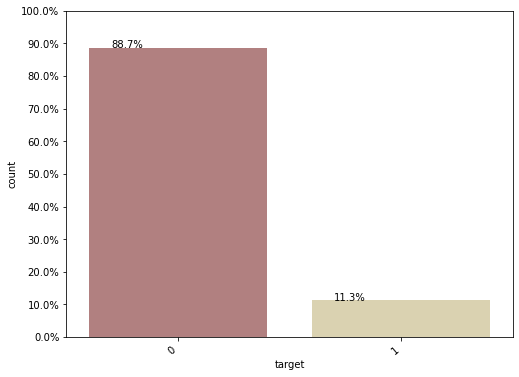

In [17]:
plt.figure(figsize=(8,6))
Y = bank_data["target"]
total = len(Y)*1.
ax=sns.countplot(x="target", data=bank_data,palette ='pink')
for p in ax.patches:
    ax.annotate('{:.1f}%'.format(100*p.get_height()/total), (p.get_x()+0.1, p.get_height()+5))

#put 11 ticks (therefore 10 steps), from 0 to the total number of rows in the dataframe
ax.yaxis.set_ticks(np.linspace(0, total, 11))
#adjust the ticklabel to the desired format, without changing the position of the ticks.
ax.set_yticklabels(map('{:.1f}%'.format, 100*ax.yaxis.get_majorticklocs()/total))
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
plt.show()




There are 5289 which is 11.7% of customers have subscribed to the term deposit and around 39,922 which is 88.3% have not subscribed to the term deposit.

In [18]:
def countplot_withY(label, dataset):
    plt.figure(figsize=(20,10))
    Y = bank_data[label]
    total = len(Y)*1.
    ax=sns.countplot(x=label, data=dataset, hue="target",palette = 'pink')
    for p in ax.patches:
        ax.annotate('{:.1f}%'.format(100*p.get_height()/total), (p.get_x()+0.1, p.get_height()+5))

#put 11 ticks (therefore 10 steps), from 0 to the total number of rows in the dataframe
ax.yaxis.set_ticks(np.linspace(0, total, 11))
#adjust the ticklabel to the desired format, without changing the position of the ticks.
ax.set_yticklabels(map('{:.1f}%'.format, 100*ax.yaxis.get_majorticklocs()/total))
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
# ax.legend(labels=["no","yes"])
plt.show()


In [19]:
def countplot(label, dataset):
    plt.figure(figsize=(15,10))
    Y = bank_data[label]
    total = len(Y)*1.
    ax=sns.countplot(x=label, data=dataset)
    for p in ax.patches:
        ax.annotate('{:.1f}%'.format(100*p.get_height()/total), (p.get_x()+0.1, p.get_height()+5))

#put 11 ticks (therefore 10 steps), from 0 to the total number of rows in the dataframe
ax.yaxis.set_ticks(np.linspace(0, total, 11))
#adjust the ticklabel to the desired format, without changing the position of the ticks.
ax.set_yticklabels(map('{:.1f}%'.format, 100*ax.yaxis.get_majorticklocs()/total))
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
# ax.legend(labels=["no","yes"])
plt.show()

# Categorical Values

## Last Contact Month Of Year

In [20]:
months_order = ["jan", "feb", "mar", "apr", "may", "jun", "jul", "aug", "sep", "oct", "nov", "dec"]
bank_data['month'] = pd.Categorical(bank_data['month'], 
                     categories=months_order, ordered=True)


In [21]:
monthly_subscribers = bank_data.groupby('month')['target'].sum()
monthly_subscribers

month
jan      0
feb      0
mar    276
apr    539
may    886
jun    559
jul    648
aug    655
sep    256
oct    315
nov    416
dec     89
Name: target, dtype: int64

In [22]:
monthly_subscribers.idxmax()

'may'

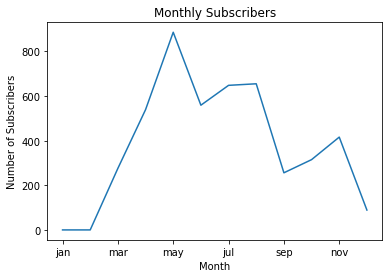

In [23]:
monthly_subscribers.plot(kind='line')

plt.title('Monthly Subscribers')
plt.xlabel('Month')
plt.ylabel('Number of Subscribers')
plt.show()


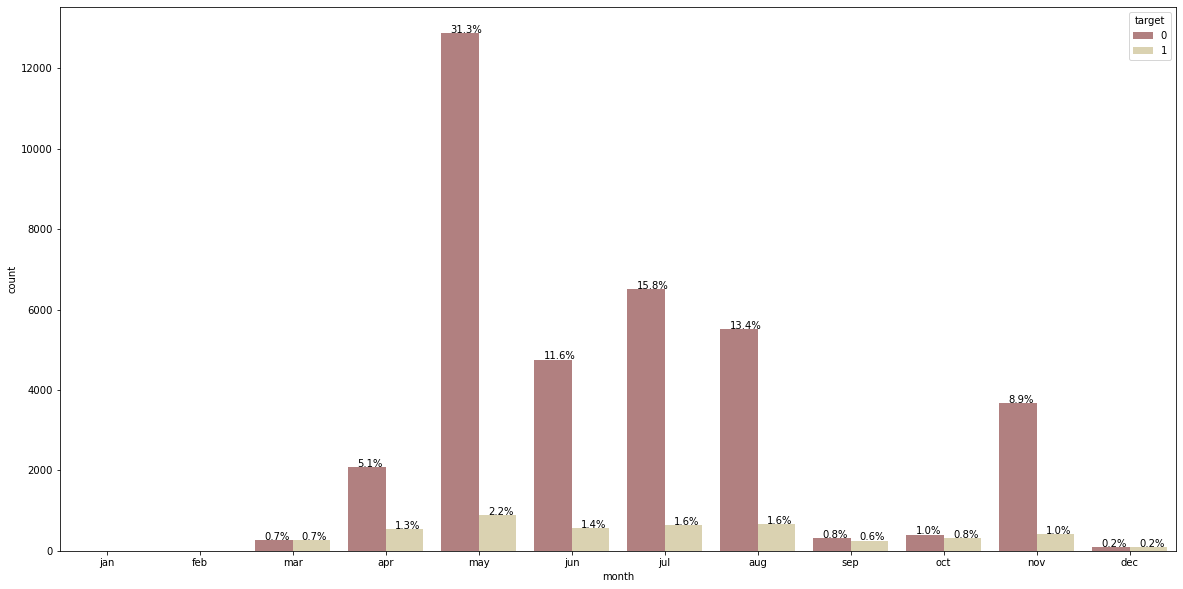

In [24]:
countplot_withY("month", bank_data)

highest frequency of customers contact to subscribe to the term deposit.

May has highest frequency of customers contact to subscribe to the term deposit. This information can be useful for identifying patterns in customer behavior and for optimizing marketing and outreach efforts to improve subscription rates. 

## Last Contact Day Of The Week

In [25]:
days_order = ["mon", "tue", "wed", "thu", "fri", "sat", "sun"]
bank_data['day_of_week'] = pd.Categorical(bank_data['day_of_week'], 
                     categories=days_order, ordered=True)


In [26]:
day_subscribers = bank_data.groupby('day_of_week')['target'].sum()
day_subscribers

day_of_week
mon     847
tue     953
wed     949
thu    1044
fri     846
sat       0
sun       0
Name: target, dtype: int64

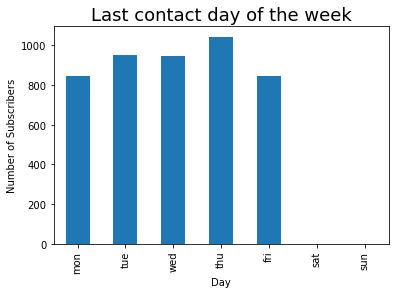

In [27]:
day_subscribers.plot(kind='bar')
plt.title('Last contact day of the week', fontsize=18)
plt.xlabel('Day')
plt.ylabel('Number of Subscribers')
plt.show()

The day of the week is not relevant as we have the same amount of data for all the data of the week

## Has Housing Loan

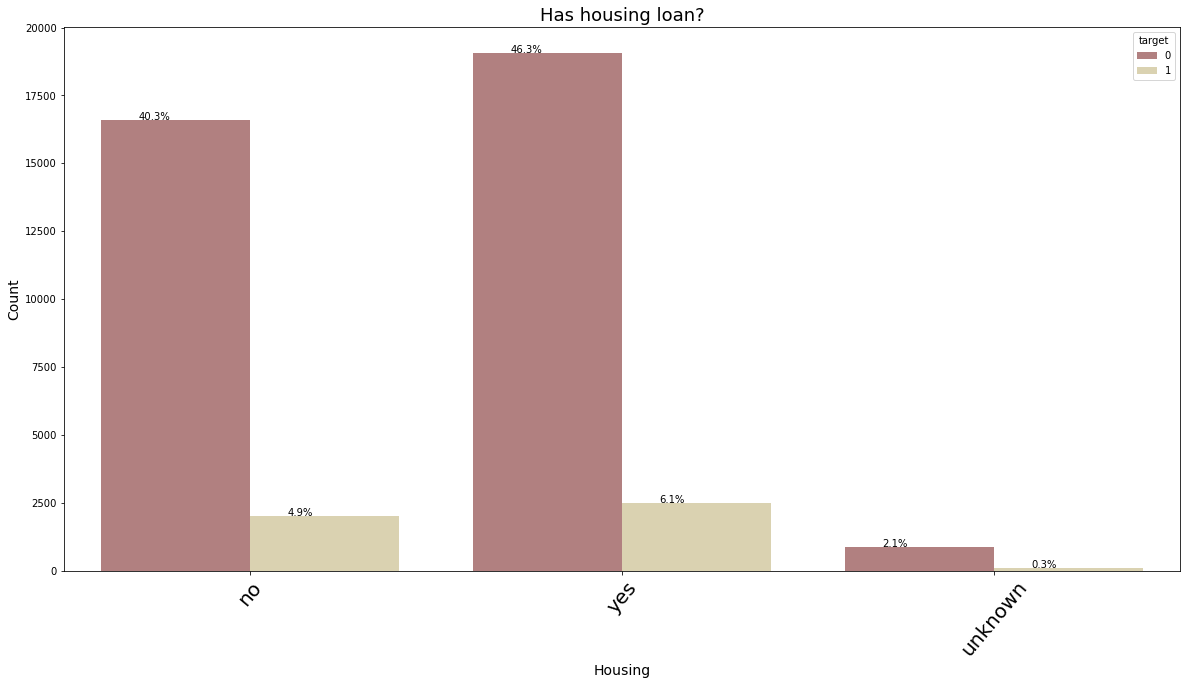

In [28]:
countplot_withY("housing", bank_data)

plt.title('Has housing loan?', fontsize=18)
plt.xlabel('Housing', fontsize=14)
plt.ylabel('Count', fontsize=14)
#plt.legend(fontsize=28)
plt.xticks(rotation=50, fontsize=20)
plt.show()


In [29]:
def countplot_withY(x, data):
    # set the figure size
    plt.figure(figsize=(8, 6))
    # create the countplot
    sns.countplot(x=x, data=data, hue='target', palette={'no':'grey', 'yes':'lightgreen'})
    # set the x and y labels
    plt.xlabel(x.capitalize(), fontsize=14)
    plt.ylabel('Count', fontsize=14)
    # set the tick label size
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)


About 18,000 customers who have been contact does not have housing loans and about 22,000 customers have housing loans and the rest is unknown.

## Types of Job

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


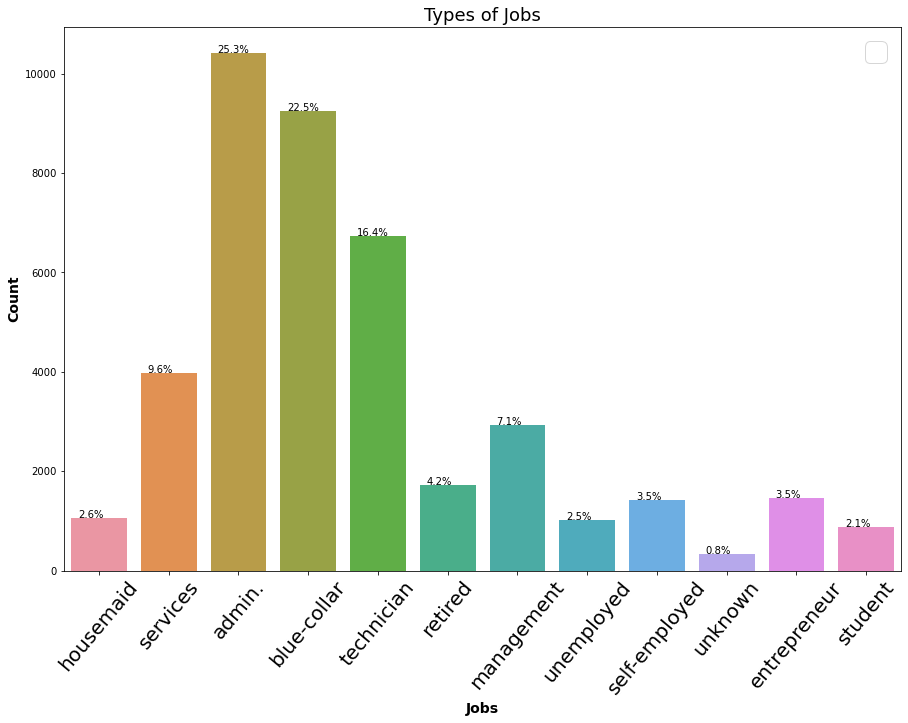

In [30]:
countplot("job", bank_data)

plt.title('Types of Jobs', fontsize=18)
plt.xlabel('Jobs', fontsize=14,fontweight='bold')
plt.ylabel('Count', fontsize=14,fontweight='bold')
plt.legend(fontsize=28)
plt.xticks(rotation=50, fontsize=20)
plt.show()

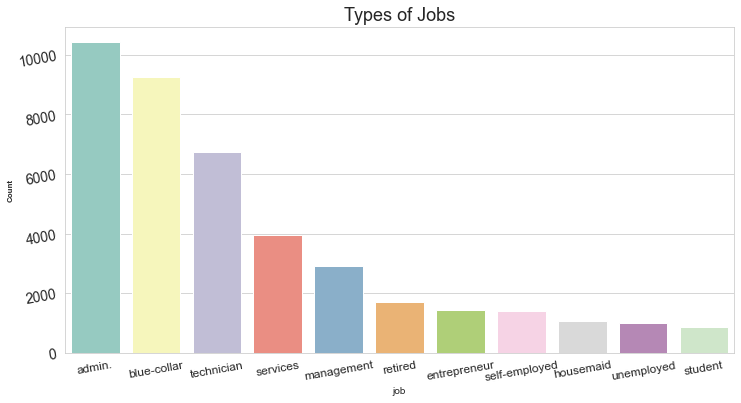

In [31]:
import seaborn as sns

sns.set_style("whitegrid")

job_counts = bank_data[bank_data['job'] != 'unknown']['job'].value_counts()

plt.figure(figsize=(12,6))
sns.countplot(x="job", data=bank_data[bank_data['job'] != 'unknown'], order=job_counts.index, palette='Set3')
plt.title('Types of Jobs', fontsize=18)
#plt.xlabel('Jobs', fontsize=14, fontweight='bold')
plt.ylabel('Count', fontsize=8, fontweight='bold')
plt.yticks(rotation=10, fontsize=14)

plt.xticks(rotation=10, fontsize=12)
plt.show()


Most of the customers have jobs as Admin, Blue-Collar, and Technician. 

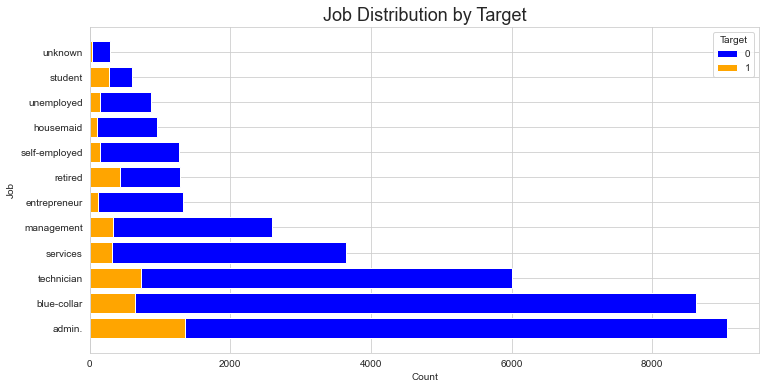

In [32]:
job_counts = bank_data['job'].value_counts()
job_0_counts = bank_data.loc[bank_data['target'] == 0]['job'].value_counts()
job_1_counts = bank_data.loc[bank_data['target'] == 1]['job'].value_counts()

fig, ax = plt.subplots(figsize=(12,6))
ax.barh(job_0_counts.index, job_0_counts.values, label='0', color='blue')
ax.barh(job_1_counts.index, job_1_counts.values, label='1', color='orange')

# for i, v in enumerate(job_0_counts.values):
#     ax.text(v, i, str(round((v/job_counts[job_0_counts.index[i]])*100,2))+'%', fontweight='bold', color='white', ha='right', va = 'center')
    
# for i, v in enumerate(job_1_counts.values):
#     ax.text(v, i, str(round((v/job_counts[job_1_counts.index[i]])*100,2))+'%', fontweight='bold', color='white', ha='left', va='center')

ax.legend(title='Target')
ax.set_xlabel('Count')
ax.set_ylabel('Job')
ax.set_title('Job Distribution by Target', fontsize=18)
plt.show()


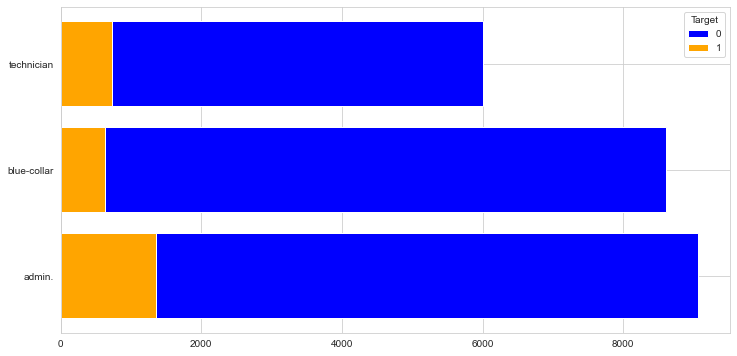

In [33]:
job_counts = bank_data[~bank_data['job'].isin(["entrepreneur","housemaid","management","retired","self-employed","services","student","unemployed", "unknown"])]\
            ['job'].value_counts()
job_0_counts = bank_data.loc[(bank_data['target'] == 0) & (~bank_data['job'].isin(["entrepreneur","housemaid","management","retired","self-employed","services","student","unemployed", "unknown"]))]\
                ['job'].value_counts()
job_1_counts = bank_data.loc[(bank_data['target'] == 1) & (~bank_data['job'].isin(["entrepreneur","housemaid","management","retired","self-employed","services","student","unemployed", "unknown"]))]\
                ['job'].value_counts()

fig, ax = plt.subplots(figsize=(12,6))
ax.barh(job_0_counts.index, job_0_counts.values, label='0', color='blue')
ax.barh(job_1_counts.index, job_1_counts.values, label='1', color='orange')

plt.rc('ytick',labelsize = 25)
plt.rc('xtick',labelsize = 20)
ax.legend(title='Target')
#ax.set_xlabel('Count')
#ax.set_ylabel('Job', fontsize = 20)
#ax.set_title('Top 3', fontsize=18)
plt.show()


Customers who have a job of admin have the highest rate of subscribing a term deposit, but they are also the hihest when it comes to not subscribing. This could be because there are more customers working as admin than any other profession. 

## Marital Status

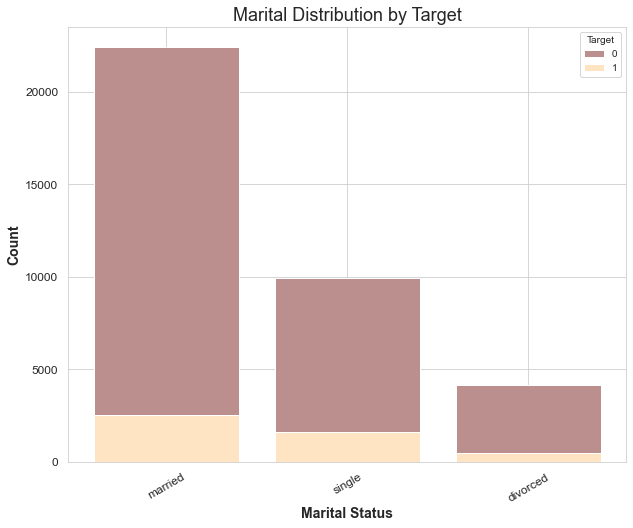

In [34]:
marital_counts = bank_data[bank_data['marital'] != 'unknown']['marital'].value_counts()
marital_0_counts = bank_data.loc[(bank_data['target'] == 0) & (bank_data['marital'] != 'unknown')]['marital'].value_counts()
marital_1_counts = bank_data.loc[(bank_data['target'] == 1) & (bank_data['marital'] != 'unknown')]['marital'].value_counts()

fig, ax = plt.subplots(figsize=(10,8))
ax.bar(marital_0_counts.index, marital_0_counts.values, label='0', color='rosybrown')
ax.bar(marital_1_counts.index, marital_1_counts.values, label='1', color='bisque')

ax.set_xlabel('Marital Status', fontweight='bold', fontsize=14)
ax.set_ylabel('Count', fontweight='bold', fontsize=14)
ax.set_title('Marital Distribution by Target', fontsize=18)

ax.tick_params(axis='x', which='both', labelsize=12, width=1, length=5, pad=5)
ax.tick_params(axis='y', which='both', labelsize=12, width=1, length=5, pad=5)

ax.legend(title='Target', loc='upper right')
plt.xticks(rotation=30)

plt.show()


Married customers have the highest rate of subscribing a term deposit 

## Default - not included

There is no customer who has credit in default. Majority of customers don't have, and the rest of the customers is unknown.

# Continuous Variables

## Duration 

last contact duration, in seconds (numeric). Important note:  this attribute highly affects the output target (e.g., if duration=0 then y="no"). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.

/var/folders/dn/9qflv0c57rl7ynhwt9tnqmrr0000gn/T/ipykernel_28100/1767529198.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(bank_data["duration"])


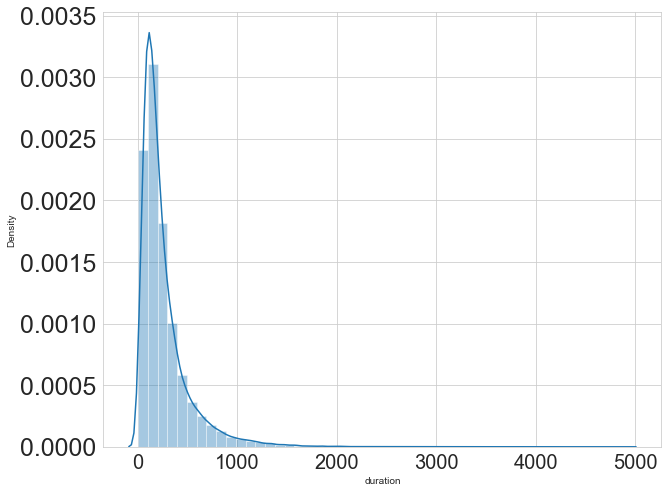

In [35]:
plt.figure(figsize=(10,8))
sns.distplot(bank_data["duration"])
plt.show()


/var/folders/dn/9qflv0c57rl7ynhwt9tnqmrr0000gn/T/ipykernel_28100/1539147737.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(bank_data["duration"], color='green', kde_kws={'color': 'blue'})


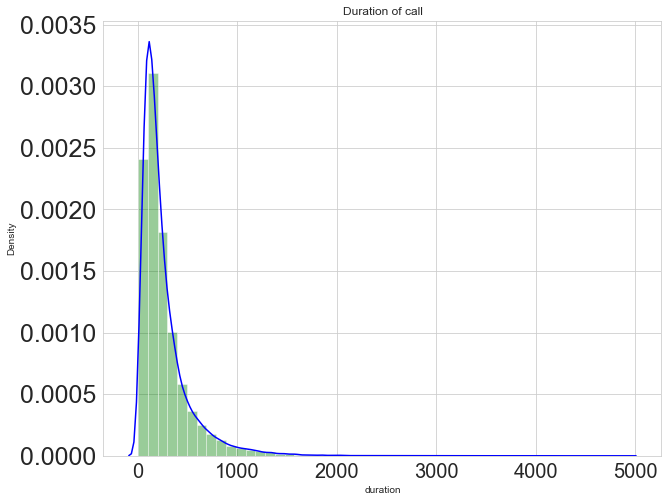

In [36]:
plt.figure(figsize=(10,8))
sns.distplot(bank_data["duration"], color='green', kde_kws={'color': 'blue'})
plt.title('Duration of call',fontsize=12)
plt.show()


/var/folders/dn/9qflv0c57rl7ynhwt9tnqmrr0000gn/T/ipykernel_28100/3703309869.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(bank_data["duration"])


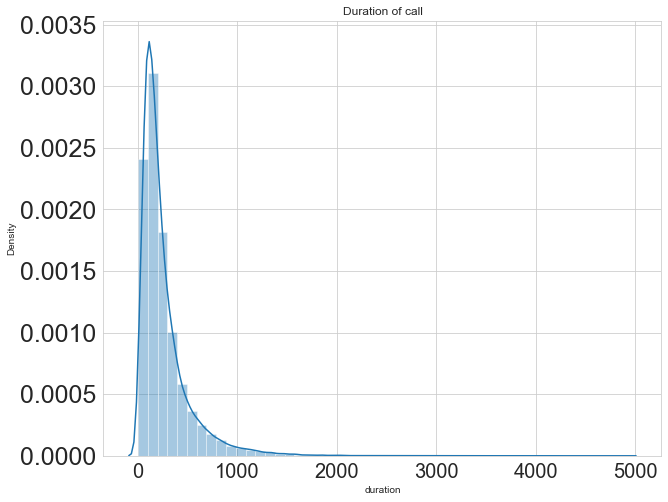

In [37]:
plt.figure(figsize=(10,8))
sns.distplot(bank_data["duration"])
plt.title('Duration of call',fontsize=12)
plt.show()


The distribution plot shows that most values are very low and very few have high values.

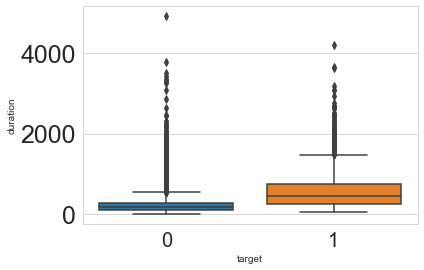

In [38]:
sns.boxplot(data=bank_data, x="target", y="duration")
plt.show()

The duration of a customer can be a useful predictor because it is already mentioned in the data that this field highely affects the target variable and should only be used for benchmark purposes. 

## Age

In [39]:
bank_data['age'].describe()

count    41176.00000
mean        40.02380
std         10.42068
min         17.00000
25%         32.00000
50%         38.00000
75%         47.00000
max         98.00000
Name: age, dtype: float64

<Figure size 720x576 with 0 Axes>

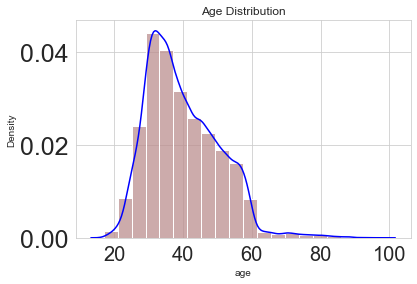

<Figure size 720x576 with 0 Axes>

In [40]:
ax = sns.histplot(data=bank_data, x=bank_data['age'], kde=False,bins=20 ,stat='density', color = 'rosybrown')
sns.kdeplot(data=bank_data, x=bank_data['age'], color='blue', ax=ax)
plt.title('Age Distribution',fontsize = 12)
plt.figure(figsize=(10,8))


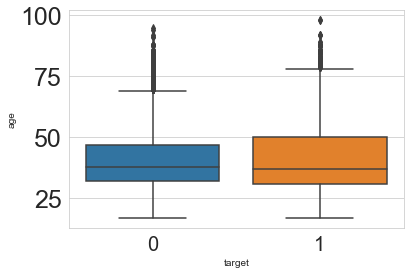

In [41]:
sns.boxplot(data=bank_data, x="target", y="age")
plt.show()

## Types of Job

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


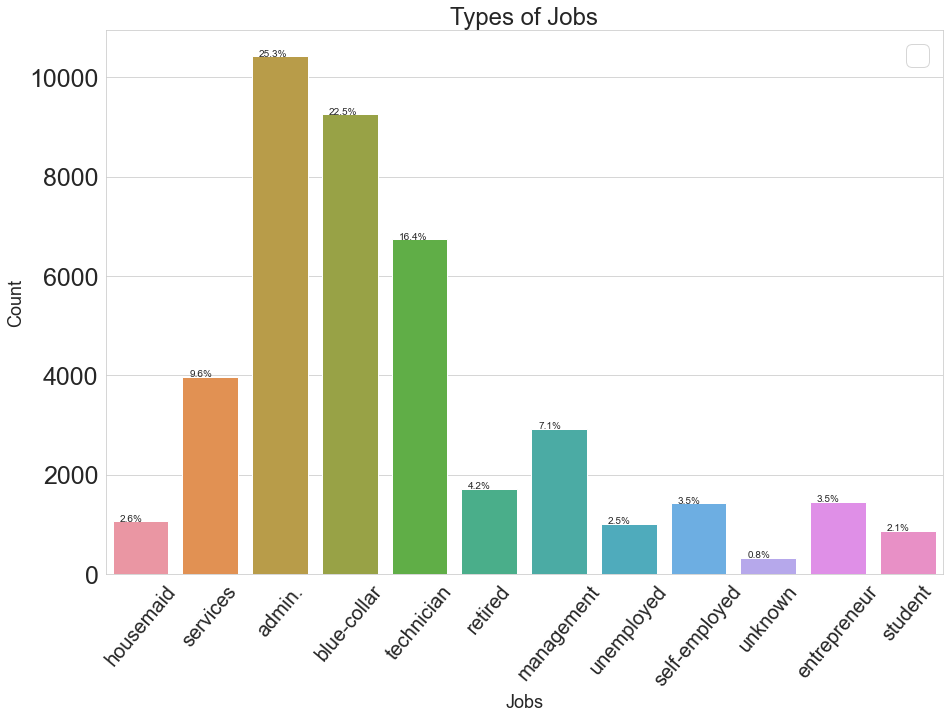

In [42]:
countplot("job", bank_data)

plt.title('Types of Jobs', fontsize=24)
plt.xlabel('Jobs', fontsize=18)
plt.ylabel('Count', fontsize=18)
plt.legend(fontsize=28)
plt.xticks(rotation=50, fontsize=20)
plt.show()

The histogram is roughly bell-shaped, with the peak at around 30-40 years old. The median age is around 38-40.

The boxplot for both the classes overlaps, indicating that age is not necessarily a good indicator for which customer will subscribe and which customer will not.

## Campaign

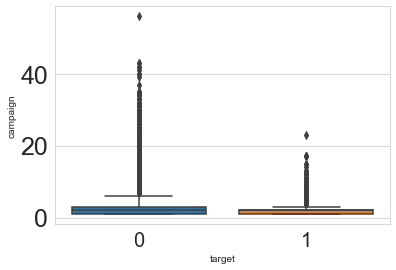

In [43]:
sns.boxplot(data=bank_data, x="target", y="campaign")
plt.show()

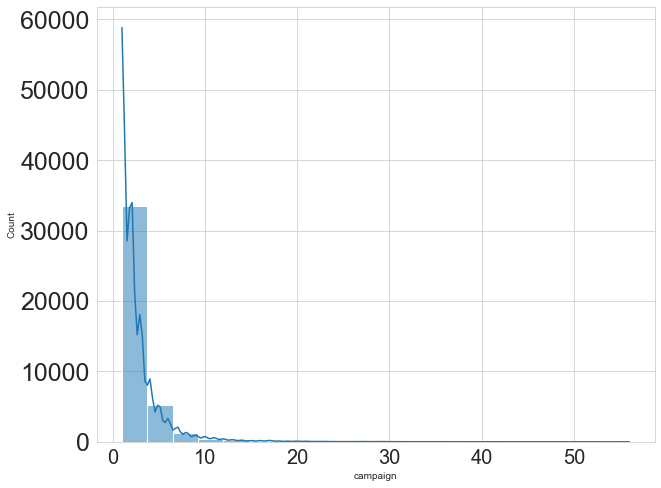

In [44]:
plt.figure(figsize=(10,8))
sns.histplot(bank_data["campaign"], bins=20, kde=True)
plt.show()

## Employment Variation Rate

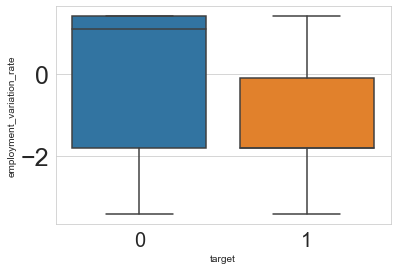

In [45]:
sns.boxplot(data=bank_data, x="target", y="employment_variation_rate")
plt.show()

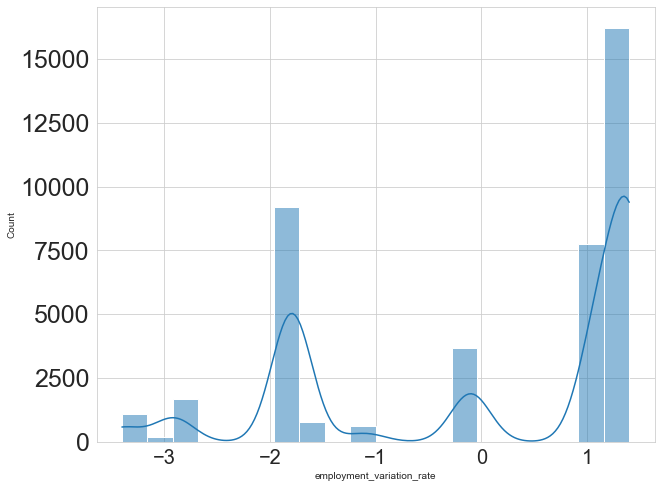

In [46]:
plt.figure(figsize=(10,8))
sns.histplot(bank_data["employment_variation_rate"], bins=20, kde=True)
plt.show()

## Consumer Price Index

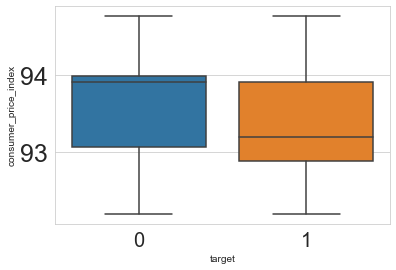

In [47]:
sns.boxplot(data=bank_data, x="target", y="consumer_price_index")
plt.show()

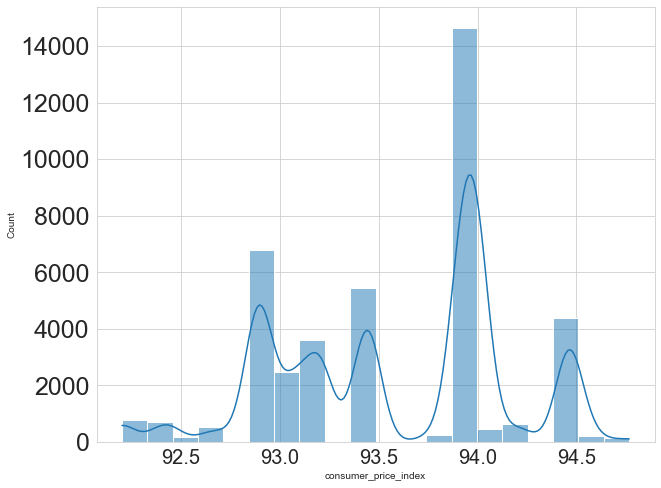

In [48]:
plt.figure(figsize=(10,8))
sns.histplot(bank_data["consumer_price_index"], bins=20, kde=True)
plt.show()

## Consumer Confidence Index

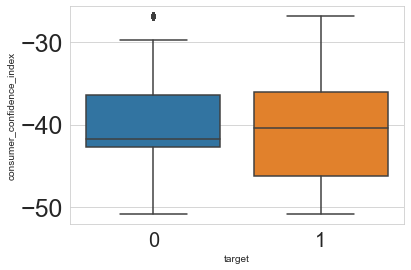

In [49]:
sns.boxplot(data=bank_data, x="target", y="consumer_confidence_index")
plt.show()

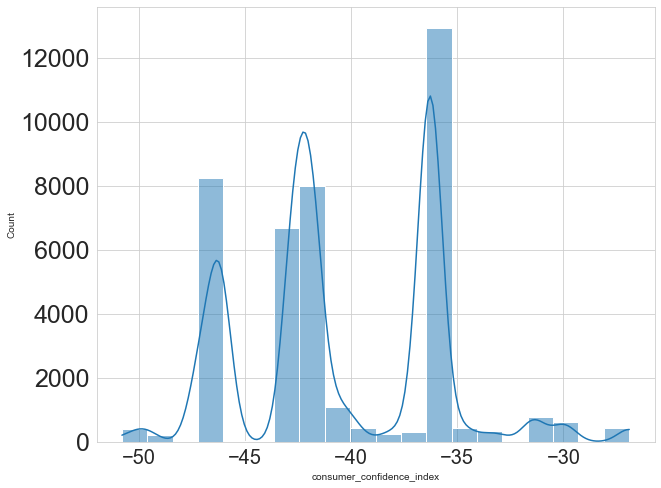

In [50]:
plt.figure(figsize=(10,8))
sns.histplot(bank_data["consumer_confidence_index"], bins=20, kde=True)
plt.show()

## Euribor 3 Month Rate [ Euro Interbank Offered Rate ]

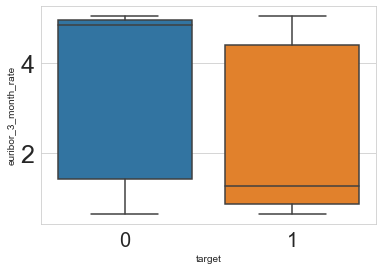

In [51]:
sns.boxplot(data=bank_data, x="target", y="euribor_3_month_rate")
plt.show()

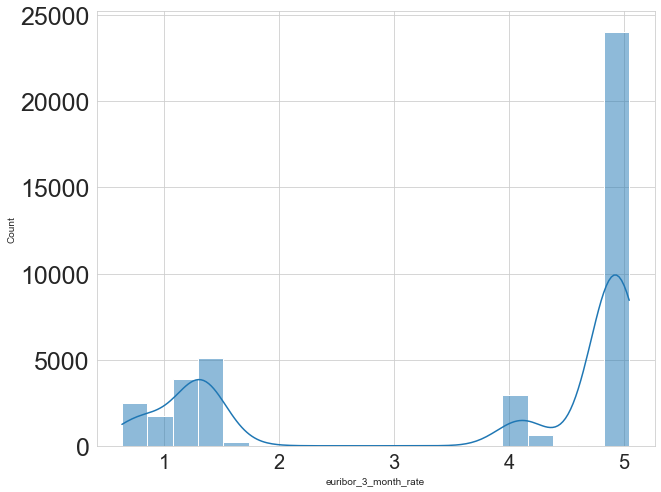

In [52]:
plt.figure(figsize=(10,8))
sns.histplot(bank_data["euribor_3_month_rate"], bins=20, kde=True)
plt.show()

## Number Of Employees

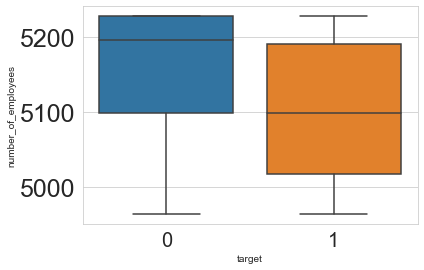

In [53]:
sns.boxplot(data=bank_data, x="target", y="number_of_employees")
plt.show()

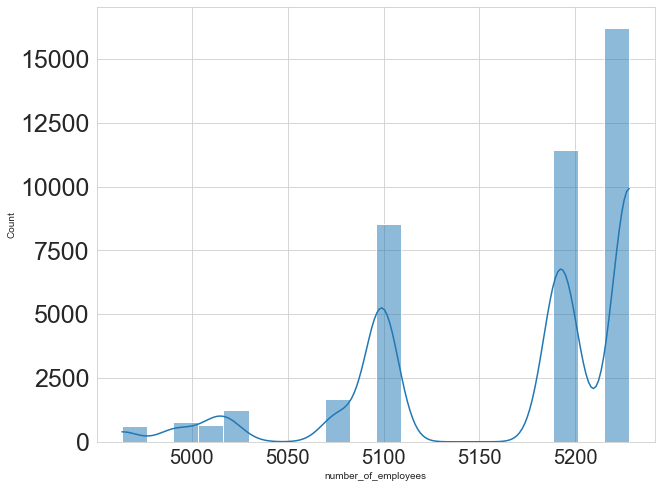

In [54]:
plt.figure(figsize=(10,8))
sns.histplot(bank_data["number_of_employees"], bins=20, kde=True)
plt.show()

## Previous - number of contacts performed before this campaign and for this client

In [55]:
bank_data["previous"].value_counts()


0    35551
1     4561
2      754
3      216
4       70
5       18
6        5
7        1
Name: previous, dtype: int64

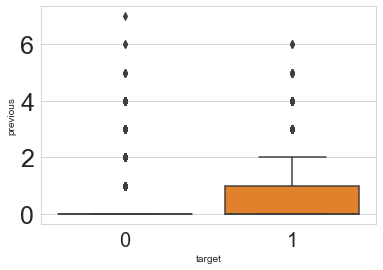

In [56]:
sns.boxplot(data=data, x="target", y="previous")
plt.show()

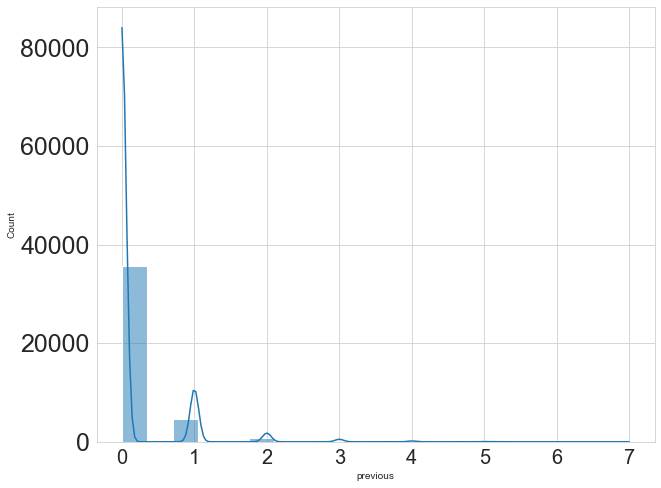

In [57]:
plt.figure(figsize=(10,8))
sns.histplot(bank_data["previous"], bins=20, kde=True)
plt.show()

Text(0.5, 1.05, 'Pearson correlation of Features')

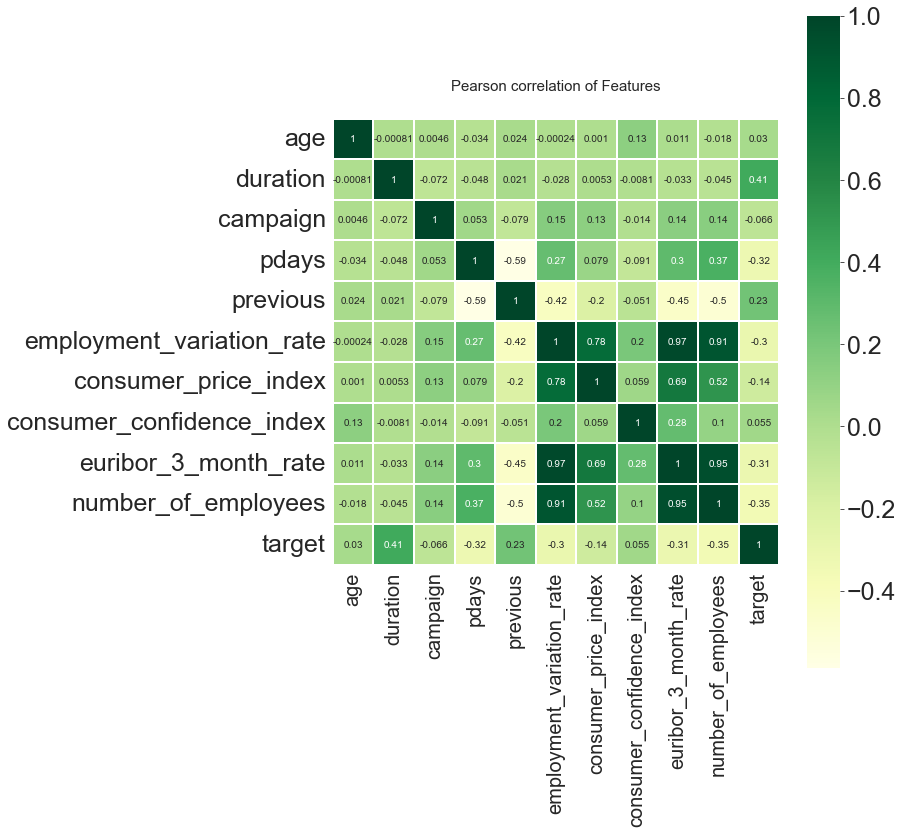

In [58]:
corr = bank_data.corr()

f, ax = plt.subplots(figsize=(10,12))

cmap = sns.diverging_palette(220, 10, as_cmap=True)

_ = sns.heatmap(corr, cmap="YlGn", square=True, ax=ax, annot=True, linewidth=0.1)

plt.title("Pearson correlation of Features", y=1.05, size=15)

There is high correlation between the number of employees and the Euro Interbank Offered Rate with a correlation values of 0.95. 

Euro Interbank Offered Rate and the employee variation rate has a correlation value of 0.97, which is very high compared to the other numerical features. 

In [59]:
bank_data.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,employment_variation_rate,consumer_price_index,consumer_confidence_index,euribor_3_month_rate,number_of_employees,target,is_new
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,261,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0,new
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,149,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0,new
2,37,services,married,high.school,no,yes,no,telephone,may,mon,226,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0,new
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,151,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0,new
4,56,services,married,high.school,no,no,yes,telephone,may,mon,307,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0,new


               age      duration      campaign         pdays      previous  \
count  41176.00000  41176.000000  41176.000000  41176.000000  41176.000000   
mean      40.02380    258.315815      2.567879    962.464810      0.173013   
std       10.42068    259.305321      2.770318    186.937102      0.494964   
min       17.00000      0.000000      1.000000      0.000000      0.000000   
25%       32.00000    102.000000      1.000000    999.000000      0.000000   
50%       38.00000    180.000000      2.000000    999.000000      0.000000   
75%       47.00000    319.000000      3.000000    999.000000      0.000000   
max       98.00000   4918.000000     56.000000    999.000000      7.000000   

       employment_variation_rate  consumer_price_index  \
count               41176.000000          41176.000000   
mean                    0.081922             93.575720   
std                     1.570883              0.578839   
min                    -3.400000             92.201000   
25%    

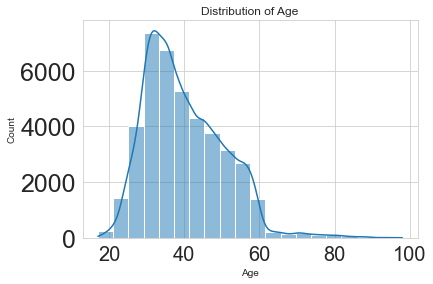

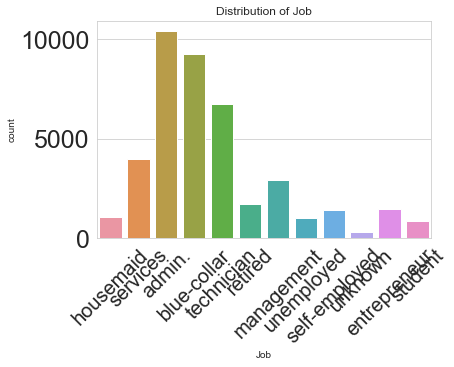

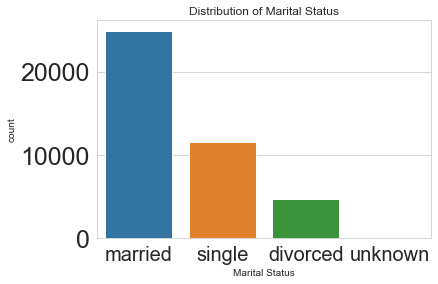

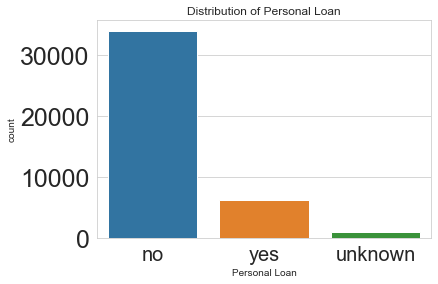

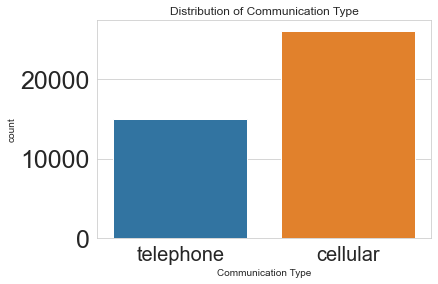

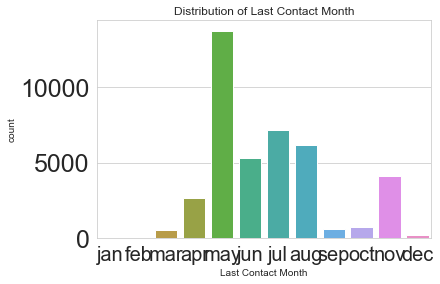

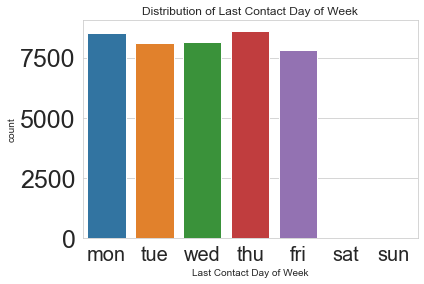

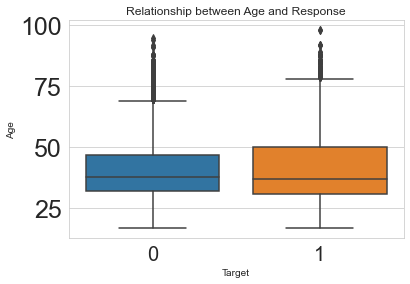

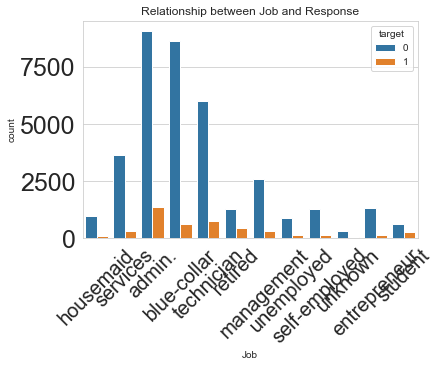

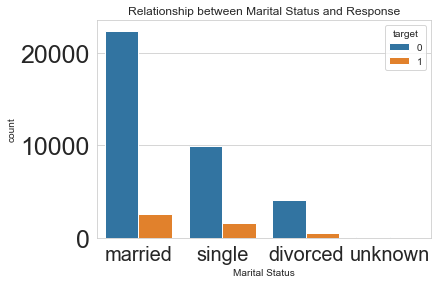

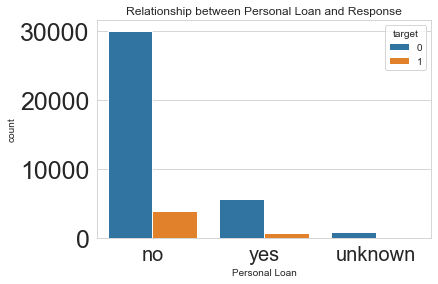

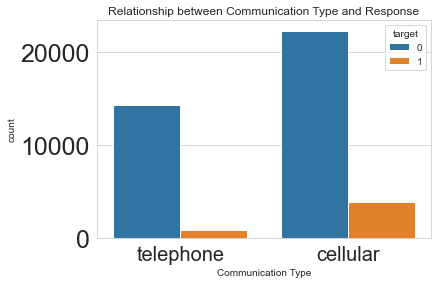

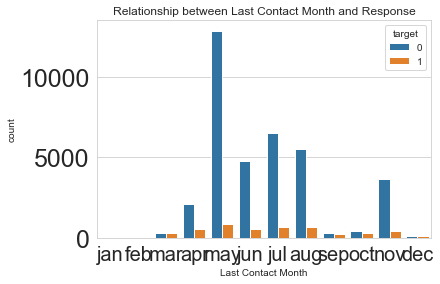

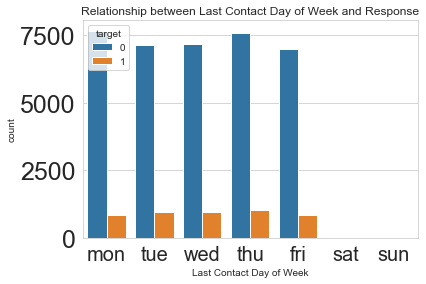

In [60]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the data
#bank_data = pd.read_csv('bank_data.csv')

# Basic statistics
print(bank_data.describe())

# Distribution of age
sns.histplot(data=bank_data, x='age', bins=20, kde=True)
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.show()

# Distribution of job
sns.countplot(data=bank_data, x='job')
plt.title('Distribution of Job')
plt.xlabel('Job')
plt.xticks(rotation=45)
plt.show()

# Marital status distribution
sns.countplot(data=bank_data, x='marital')
plt.title('Distribution of Marital Status')
plt.xlabel('Marital Status')
plt.show()

# Personal loan distribution
sns.countplot(data=bank_data, x='loan')
plt.title('Distribution of Personal Loan')
plt.xlabel('Personal Loan')
plt.show()

# Communication type distribution
sns.countplot(data=bank_data, x='contact')
plt.title('Distribution of Communication Type')
plt.xlabel('Communication Type')
plt.show()

# Last contact month distribution
sns.countplot(data=bank_data, x='month')
plt.title('Distribution of Last Contact Month')
plt.xlabel('Last Contact Month')
plt.show()

# Last contact day of week distribution
sns.countplot(data=bank_data, x='day_of_week')
plt.title('Distribution of Last Contact Day of Week')
plt.xlabel('Last Contact Day of Week')
plt.show()

# Relationship between age and response (target)
sns.boxplot(data=bank_data, x='target', y='age')
plt.title('Relationship between Age and Response')
plt.xlabel('Target')
plt.ylabel('Age')
plt.show()

# Relationship between job and response (target)
sns.countplot(data=bank_data, x='job', hue='target')
plt.title('Relationship between Job and Response')
plt.xlabel('Job')
plt.xticks(rotation=45)
plt.show()

# Relationship between marital status and response (target)
sns.countplot(data=bank_data, x='marital', hue='target')
plt.title('Relationship between Marital Status and Response')
plt.xlabel('Marital Status')
plt.show()

# Relationship between personal loan and response (target)
sns.countplot(data=bank_data, x='loan', hue='target')
plt.title('Relationship between Personal Loan and Response')
plt.xlabel('Personal Loan')
plt.show()

# Relationship between communication type and response (target)
sns.countplot(data=bank_data, x='contact', hue='target')
plt.title('Relationship between Communication Type and Response')
plt.xlabel('Communication Type')
plt.show()

# Relationship between last contact month and response (target)
sns.countplot(data=bank_data, x='month', hue='target')
plt.title('Relationship between Last Contact Month and Response')
plt.xlabel('Last Contact Month')
plt.show()

# Relationship between last contact day of week and response (target)
sns.countplot(data=bank_data, x='day_of_week', hue='target')
plt.title('Relationship between Last Contact Day of Week and Response')
plt.xlabel('Last Contact Day of Week')
plt.show()


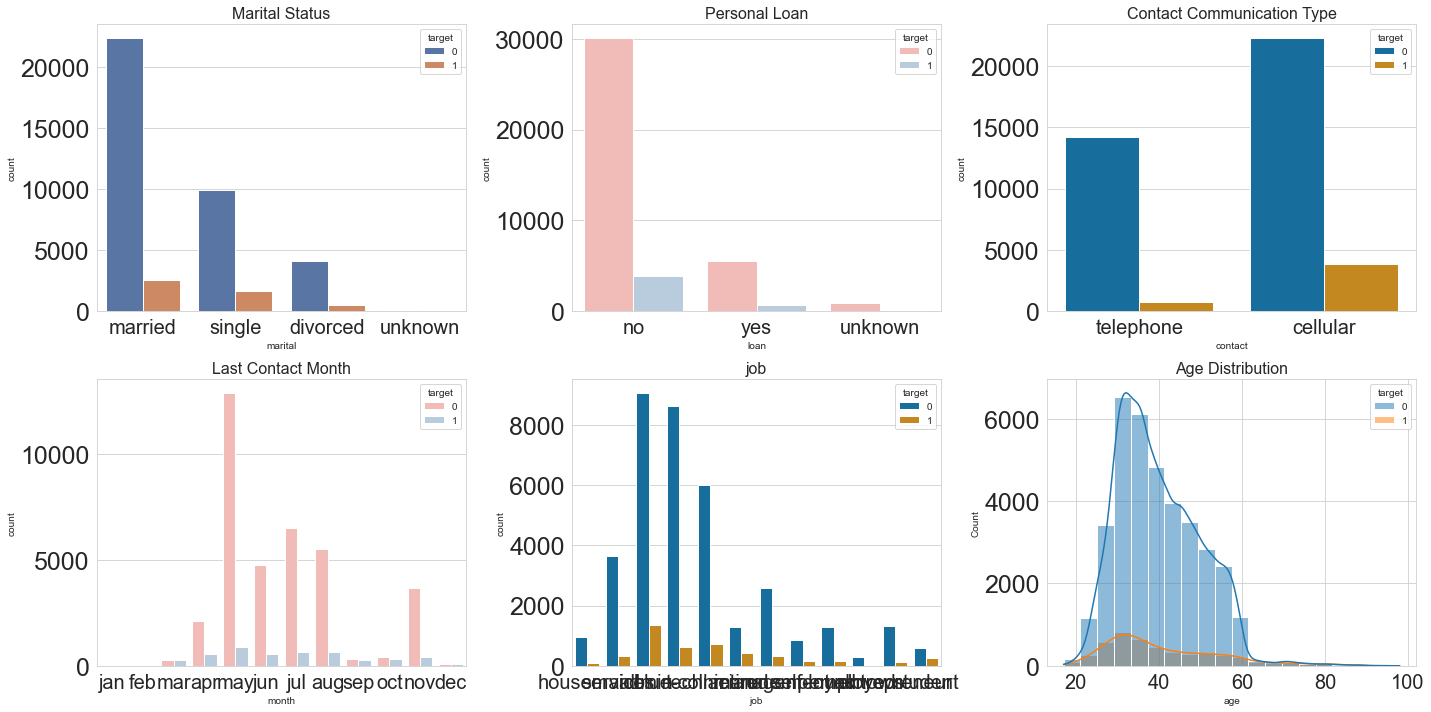

In [61]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, axs = plt.subplots(nrows=2, ncols=3, figsize=(20, 10))

sns.countplot(x='marital', data=bank_data,hue='target', ax=axs[0, 0], palette='deep')
sns.countplot(x='loan', data=bank_data,hue='target', ax=axs[0, 1], palette='Pastel1')
sns.countplot(x='contact', data=bank_data,hue='target',ax=axs[0, 2], palette='colorblind')
sns.countplot(x='month', data=bank_data,hue='target', ax=axs[1, 0], palette='Pastel1')
sns.countplot(x='job', data=bank_data,hue='target', ax=axs[1, 1], palette='colorblind')
sns.histplot(data=bank_data,hue='target', x='age', kde=True, bins=20, ax=axs[1, 2], color='pink')
sns.kdeplot(data=bank_data,hue='target', x=bank_data['age'], color='blue', ax=ax)

axs[0, 0].set_title('Marital Status', fontsize=16)
axs[0, 1].set_title('Personal Loan', fontsize=16)
axs[0, 2].set_title('Contact Communication Type', fontsize=16)
axs[1, 0].set_title('Last Contact Month', fontsize=16)
axs[1, 1].set_title('job', fontsize=16)
axs[1, 2].set_title('Age Distribution', fontsize=16)

plt.tight_layout()
#plt.savefig("myplot.svg", transparent=True)
plt.show()


Text(0.5, 1.0, 'Contact Communication Type')

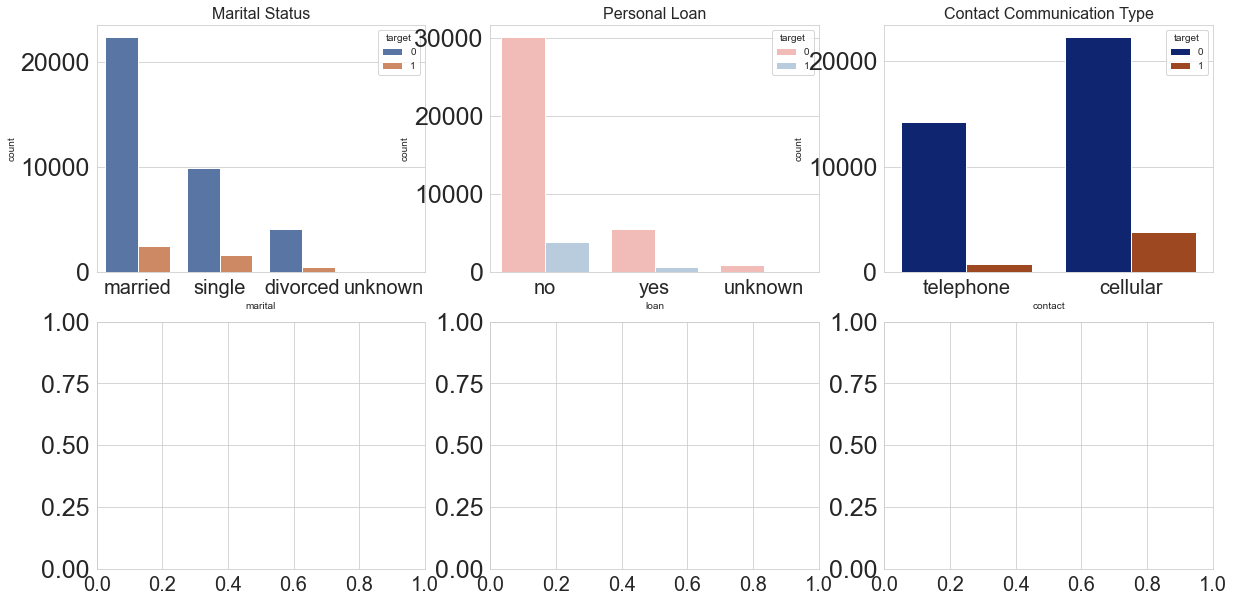

In [62]:
fig, axs = plt.subplots(nrows=2, ncols=3, figsize=(20, 10))

sns.countplot(x='marital', data=bank_data,hue='target', ax=axs[0, 0], palette='deep')
sns.countplot(x='loan', data=bank_data,hue='target', ax=axs[0, 1], palette='Pastel1')
sns.countplot(x='contact', data=bank_data,hue='target',ax=axs[0, 2], palette='dark')

axs[0, 0].set_title('Marital Status', fontsize=16)
axs[0, 1].set_title('Personal Loan', fontsize=16)
axs[0, 2].set_title('Contact Communication Type', fontsize=16)

/Users/kajalshukla/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:1138: UserWarning: cmap parameter ignored when using hue mapping.
  warnings.warn(msg, UserWarning)


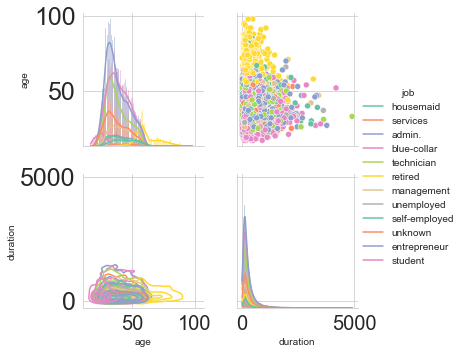

In [63]:
g = sns.PairGrid(data=bank_data, vars=['age', 'duration'], hue='job', palette='Set2')
g.map_upper(sns.scatterplot)
g.map_diag(sns.histplot, kde=True)
g.map_lower(sns.kdeplot, cmap='Blues_d')
g.add_legend()


/Users/kajalshukla/opt/anaconda3/lib/python3.9/site-packages/seaborn/axisgrid.py:1609: UserWarning: 

`shade_lowest` has been replaced by `thresh`; setting `thresh=0.05.
This will become an error in seaborn v0.13.0; please update your code.

  func(x=x, y=y, **kwargs)
/Users/kajalshukla/opt/anaconda3/lib/python3.9/site-packages/seaborn/axisgrid.py:1609: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  func(x=x, y=y, **kwargs)
/Users/kajalshukla/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:1138: UserWarning: cmap parameter ignored when using hue mapping.
  warnings.warn(msg, UserWarning)


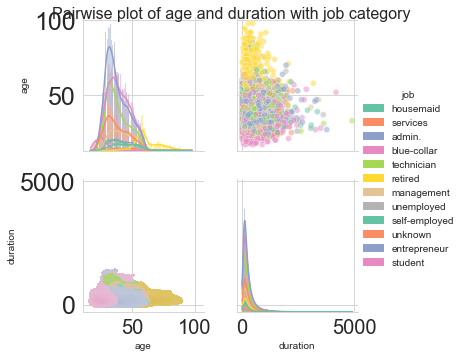

In [64]:
g = sns.PairGrid(data=bank_data, vars=['age', 'duration'], hue='job', palette='Set2')
g.map_upper(sns.scatterplot, alpha=0.5)
g.map_diag(sns.histplot, kde=True)
g.map_lower(sns.kdeplot, cmap='Blues_d', shade=True, shade_lowest=False)
g.add_legend()
g.fig.subplots_adjust(top=0.95)
g.fig.suptitle('Pairwise plot of age and duration with job category', fontsize=16)
plt.show()


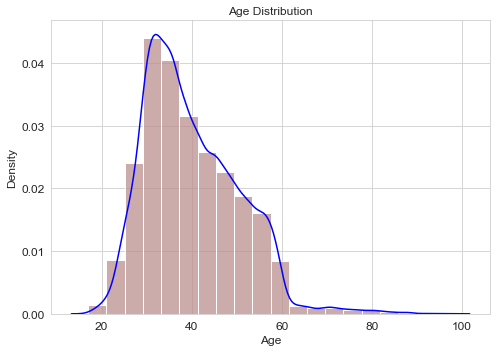

In [65]:
plt.figure(figsize=(7, 5))
ax = sns.histplot(data=bank_data, x=bank_data['age'], kde=False, bins=20, stat='density', color='rosybrown')
sns.kdeplot(data=bank_data, x=bank_data['age'], color='blue', ax=ax)
plt.title('Age Distribution', fontsize=12)
plt.xlabel('Age', fontsize=12)
plt.ylabel('Density', fontsize=12)
plt.tick_params(axis='both', labelsize=12)
plt.tight_layout()
plt.show()


/var/folders/dn/9qflv0c57rl7ynhwt9tnqmrr0000gn/T/ipykernel_28100/2936734869.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(bank_data["duration"], color='green', kde_kws={'color': 'blue'})


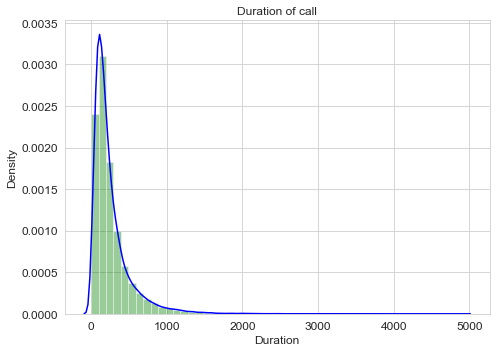

In [66]:
plt.figure(figsize=(7, 5))
sns.distplot(bank_data["duration"], color='green', kde_kws={'color': 'blue'})
plt.title('Duration of call', fontsize=12)
plt.xlabel('Duration', fontsize=12)
plt.ylabel('Density', fontsize=12)
plt.tick_params(axis='both', labelsize=12)
plt.tight_layout()
plt.show()


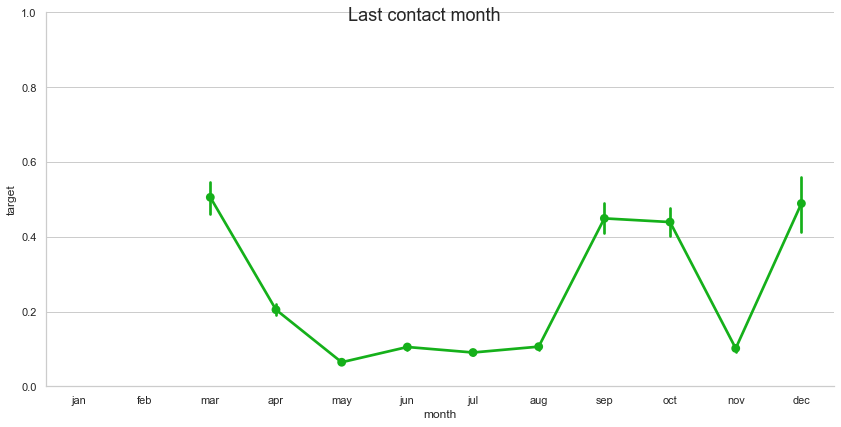

In [67]:
sns.set(style="whitegrid")
g = sns.PairGrid(data=bank_data, x_vars=['month'], y_vars='target', height=6, aspect=2)
g.map(sns.pointplot, color=sns.xkcd_rgb["green"])
g.set(ylim=(0, 1))
g.fig.suptitle('Last contact month', fontsize=18)
plt.show()

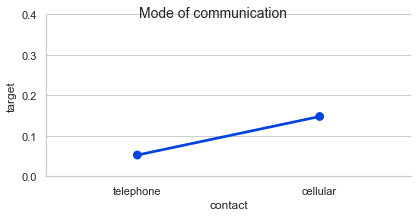

In [68]:
sns.set(style="whitegrid")
g = sns.PairGrid(data=bank_data, x_vars=['contact'], y_vars='target', height=3, aspect=2)
g.map(sns.pointplot, color=sns.xkcd_rgb["blue"])
g.set(ylim=(0, 0.4))
g.fig.suptitle('Mode of communication', fontsize=14)
plt.show()

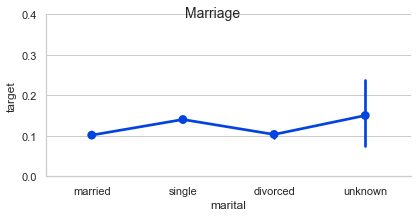

In [69]:
sns.set(style="whitegrid")
g = sns.PairGrid(data=bank_data, x_vars=['marital'], y_vars='target', height=3, aspect=2)
g.map(sns.pointplot, color=sns.xkcd_rgb["blue"])
g.set(ylim=(0, 0.4))
g.fig.suptitle('Marriage', fontsize=14)
plt.show()

# -----------------------IV and WoE--------------------

In [70]:
import pandas as pd
from pandas.api.types import is_numeric_dtype
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import seaborn as sns
import numpy as np
import math

In [71]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

data = pd.read_csv('bank_data_eda.csv')


In [72]:
data.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,employment_variation_rate,consumer_price_index,consumer_confidence_index,euribor_3_month_rate,number_of_employees,target,is_new
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,261,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0,new
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,149,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0,new
2,37,services,married,high.school,no,yes,no,telephone,may,mon,226,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0,new
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,151,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0,new
4,56,services,married,high.school,no,no,yes,telephone,may,mon,307,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0,new


In [73]:
import pandas as pd
import scipy.stats as stats

class CategoricalFeature():
    def __init__(self, df, feature):
        self.df = df
        self.feature = feature

    @property
    def df_lite(self):
        df_lite = self.df
        df_lite['bin'] = df_lite[self.feature].fillna('MISSING')
        return df_lite[['bin', 'target']]


class ContinuousFeature():
    def __init__(self, df, feature):
        self.df = df
        self.feature = feature
        self.bin_min_size = int(len(self.df) * 0.05)

    def __generate_bins(self, bins_num):
        df = self.df[[self.feature, 'target']]
        df['bin'] = pd.qcut(df[self.feature], bins_num, duplicates='drop') \
                    .apply(lambda x: x.left) \
                    .astype(float)
        return df

    def __generate_correct_bins(self, bins_max=20):
        for bins_num in range(bins_max, 1, -1):
            df = self.__generate_bins(bins_num)
            df_grouped = pd.DataFrame(df.groupby('bin') \
                                      .agg({self.feature: 'count',
                                            'target': 'sum'})) \
                                      .reset_index()
            r, p = stats.stats.spearmanr(df_grouped['bin'], df_grouped['target'])

            if (
                    abs(r)==1 and                                                        # check if woe for bins are monotonic
                    df_grouped[self.feature].min() > self.bin_min_size                   # check if bin size is greater than 5%
                    and not (df_grouped[self.feature] == df_grouped['target']).any()      # check if number of good and bad is not equal to 0
            ):
                break

        return df

    @property
    def df_lite(self):
        df_lite = self.__generate_correct_bins()
        df_lite['bin'].fillna('MISSING', inplace=True)
        return df_lite[['bin', 'target']]
    

In [74]:
import pandas as pd
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('mode.chained_assignment', None)

class AttributeRelevance():
    def seq_palette(self, n_colors):
        return sns.cubehelix_palette(n_colors, start=.5, rot=-.75, reverse=True)

    def bulk_iv(self, feats, iv, woe_extremes=False):
        iv_dict = {}
        for f in feats:
            iv_df, iv_value = iv.calculate_iv(f)
            if woe_extremes:
                iv_dict[f.feature] = [iv_value, iv_df['woe'].min(), iv_df['woe'].max()]
                cols = ['iv', 'woe_min', 'woe_max']
            else:
                iv_dict[f.feature] = iv_value
                cols = ['iv']
        df = pd.DataFrame.from_dict(iv_dict, orient='index', columns=cols)
        return df

    def bulk_stats(self, feats, s):
        stats_dict = {}
        for f in feats:
            p_value, effect_size = s.calculate_chi(f)
            stats_dict[f.feature] = [p_value, effect_size]
        df = pd.DataFrame.from_dict(stats_dict, orient='index', columns=['p-value', 'effect_size'])
        return df

    def analyze(self, feats, iv, s=None, interpretation=False):
        df_iv = self.bulk_iv(feats, iv).sort_values(by='iv', ascending=False)
        if s is not None:
            df_stats = self.bulk_stats(feats, s)
            df_iv = df_iv.merge(df_stats, left_index=True, right_index=True)
        if interpretation:
            df_iv['iv_interpretation'] = df_iv['iv'].apply(iv.interpretation)
            if s is not None:
                df_iv['es_interpretation'] = df_iv['effect_size'].apply(s.interpretation)
        return df_iv

    def draw_iv(self, feats, iv):
        df = self.analyze(feats, iv)
        fig, ax = plt.subplots(figsize=(10, 6))
        sns.barplot(x=df.index, y='iv', data=df, palette='rocket')
        ax.set_title('IV values')
        plt.xticks(rotation=90)
        plt.show()

    def draw_woe_extremes(self, feats, iv):
        df = self.bulk_iv(feats, iv, woe_extremes=True).sort_values(by='iv', ascending=False)
        fig, ax = plt.subplots(figsize=(10, 6))
        sns.barplot(x=df.index, y='woe_min', data=df, palette='rocket')
        sns.barplot(x=df.index, y='woe_max', data=df, palette='rocket')
        ax.axhline(y=0, color='black', linewidth=1)
        ax.set_title('Range of WOE values')
        ax.set_ylabel('WOE')
        plt.xticks(rotation=90)
        plt.show()

    def draw_woe_multiplot(self, feats, iv):
        n = len(feats)
        nrows = int(np.ceil(n/3))
        fig, ax = plt.subplots(nrows=nrows, ncols=3, figsize=(15, nrows*4))
        for i in range(n):
            iv_df, iv_value = iv.calculate_iv(feats[i])
            sns.barplot(x=feats[i].feature, y='woe', data=iv_df, color='#455872', ax=fig.axes[i])

        for ax in fig.axes:
            plt.sca(ax)
            plt.xticks(rotation=50)

        plt.tight_layout()
        plt.show()

class Analysis():
    def seq_palette(self, n_colors):
        return sns.cubehelix_palette(n_colors, start=.5, rot=-.75, reverse=True)

    def group_by_feature(self, feat):
        df = feat.df_lite \
                            .groupby('bin') \
                            .agg({'target': ['count', 'sum']}) \
                            .reset_index()
        df.columns = [feat.feature, 'count', 'good']
        df['bad'] = df['count'] - df['good']
        return df

class StatsSignificance(Analysis):
    def calculate_chi(self, feat):
        df = self.group_by_feature(feat)
        df_chi = np.array(df[['good', 'bad']])
        n = df['count'].sum()

        chi = stats.chi2_contingency(df_chi)
        cramers_v = np.sqrt(chi[0] / n)          # assume that k=2 (good, bad)
        return chi[1], cramers_v

    @staticmethod
    def interpretation(cramers_v):
        if cramers_v < 0.1:
            return 'useless'
        elif cramers_v < 0.2:
            return 'weak'
        elif cramers_v < 0.4:
            return 'medium'
        elif cramers_v < 0.6:
            return 'strong'
        else:
            return 'very strong'

    def interpret_chi(self, feat):
        _, cramers_v = self.calculate_chi(feat)
        return self.interpretation(cramers_v)

    def print_chi(self, feat):
        p_value, cramers_v = self.calculate_chi(feat)
        print('P-value: %0.2f\nEffect size: %0.2f' % (p_value, cramers_v))
        print('%s is a %s predictor' % (feat.feature.capitalize(), self.interpretation(cramers_v)))


class IV(Analysis):
    @staticmethod
    def __perc_share(df, group_name):
        return df[group_name] / df[group_name].sum()

    def __calculate_perc_share(self, feat):
        df = self.group_by_feature(feat)
        df['perc_good'] = self.__perc_share(df, 'good')
        df['perc_bad'] = self.__perc_share(df, 'bad')
        df['perc_diff'] = df['perc_good'] - df['perc_bad']
        return df

    def __calculate_woe(self, feat):
        df = self.__calculate_perc_share(feat)
        df['woe'] = np.log(df['perc_good']/df['perc_bad'])
        df['woe'] = df['woe'].replace([np.inf, -np.inf], np.nan).fillna(0)
        return df

    def calculate_iv(self, feat):
        df = self.__calculate_woe(feat)
        df['iv'] = df['perc_diff'] * df['woe']
        return df, df['iv'].sum()

    def draw_woe(self, feat):
        iv_df, iv_value = self.calculate_iv(feat)
        fig, ax = plt.subplots(figsize=(8,10))
        sns.set_style("white", {"axes.facecolor": (0, 0, 0, 0)})
        sns.set_style("white", {"legend.facecolor": (0, 0, 0, 0)})
        sns.barplot(x=feat.feature, y='woe', data=iv_df, palette='rocket')
        ax.set_title('WOE visualization for: ' + feat.feature, fontsize=14)
        if feat.feature == 'duration' or feat.feature == 'job' or feat.feature == 'education_mod':
            plt.xticks(rotation=90, fontsize=15)
            plt.yticks(fontsize=14)
            ax.set_ylabel('Woe', fontsize=18)
            ax.set_xlabel('')
            plt.show() 
        else:
            plt.xticks(fontsize=16)
            plt.yticks(fontsize=14)
            ax.set_ylabel('Woe', fontsize=18)
            ax.set_xlabel('')
            plt.show()            

    @staticmethod
    def interpretation(iv):
        if iv < 0.02:
            return 'useless'
        elif iv < 0.1:
            return 'weak'
        elif iv < 0.3:
            return 'medium'
        elif iv < 0.5:
            return 'strong'
        else:
            return 'suspicious'

    def interpret_iv(self, feat):
        _, iv = self.calculate_iv(feat)
        return self.interpretation(iv)

    def print_iv(self, feat):
        _, iv = self.calculate_iv(feat)
        print('Information value: %0.2f' % iv)
        print('%s is a %s predictor' % (feat.feature.capitalize(), self.interpretation(iv)))
        

In [75]:
data['duration'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 41176 entries, 0 to 41175
Series name: duration
Non-Null Count  Dtype
--------------  -----
41176 non-null  int64
dtypes: int64(1)
memory usage: 321.8 KB


In [76]:
iv = IV()
s = StatsSignificance()
ar = AttributeRelevance()

In [77]:
data['age_mod']=data['age'].apply(lambda x: '17_34' if x<=34 else ('35_44' if x<=44 else ('45_54' if x<=54 else '55plus')))

data['education_mod']=data['education'].map({'university.degree':'university_graduate','high.school':'school_passout','basic.9y':'school_dropout','basic.4y':'school_dropout','basic.6y':'school_dropout','professional.course':'advanced_degree','unknown':'unknown','illiterate':'unknown'})

data = data.drop(['education', 'age'], axis=1)


In [78]:
data.head()

,job,marital,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,employment_variation_rate,consumer_price_index,consumer_confidence_index,euribor_3_month_rate,number_of_employees,target,is_new,age_mod,education_mod
0,housemaid,married,no,no,no,telephone,may,mon,261,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0,new,55plus,school_dropout
1,services,married,unknown,no,no,telephone,may,mon,149,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0,new,55plus,school_passout
2,services,married,no,yes,no,telephone,may,mon,226,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0,new,35_44,school_passout
3,admin.,married,no,no,no,telephone,may,mon,151,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0,new,35_44,school_dropout
4,services,married,no,no,yes,telephone,may,mon,307,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0,new,55plus,school_passout


### ContinuousFeature - this class provides a simple and automated way to bin a continuous feature and generate a dataframe

In [79]:
# Continuous
feat_age = CategoricalFeature(data, 'age_mod')

feat_duration = ContinuousFeature(data, 'duration') # not included on the deck

feat_employment_variation_rate = ContinuousFeature(data, 'employment_variation_rate')


## AGE

In [80]:
feat_age.df_lite.head()

,bin,target
0,55plus,0
1,55plus,0
2,35_44,0
3,35_44,0
4,55plus,0


In [81]:
iv.group_by_feature(feat_age)

,age_mod,count,good,bad
0,17_34,14751,1922,12829
1,35_44,13495,1168,12327
2,45_54,8702,752,7950
3,55plus,4228,797,3431


In [82]:
iv_df, iv_value = iv.calculate_iv(feat_age)
display(iv_df)
print('Information value: ', iv_value)

,age_mod,count,good,bad,perc_good,perc_bad,perc_diff,woe,iv
0,17_34,14751,1922,12829,0.414313,0.351124,0.063190,0.165485,0.010457
1,35_44,13495,1168,12327,0.251778,0.337384,-0.085606,-0.292672,0.025054
2,45_54,8702,752,7950,0.162104,0.217588,-0.055484,-0.294364,0.016332
3,55plus,4228,797,3431,0.171804,0.093905,0.077899,0.604074,0.047057


Information value:  0.09890086314772521


The positive WoE value tells us that the distribution of customer who subscribed is greater than the distribution of customer who did not subscribe

an IV value of 0.0045060613485613625 suggests that age is not a strong predictor of subscribing to a term deposit.

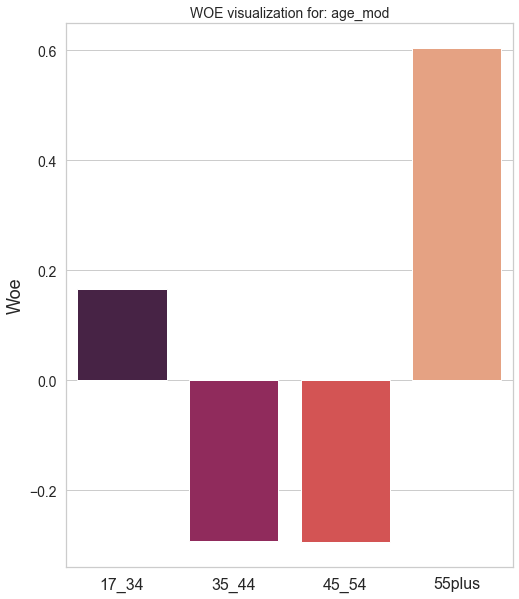

In [83]:
iv.draw_woe(feat_age)

### statsSignificance

In [84]:
p_value, effect_size = s.calculate_chi(feat_age)
print('A feature with effect size: %0.2f' % effect_size)
s.print_chi(feat_age)


A feature with effect size: 0.10
P-value: 0.00
Effect size: 0.10
Age_mod is a weak predictor


## DURATION

In [85]:
feat_duration.df_lite.head()

,bin,target
0,258.0,0
1,142.0,0
2,202.0,0
3,142.0,0
4,296.0,0


In [86]:
iv.group_by_feature(feat_duration)

,duration,count,good,bad
0,-0.001,2292,1,2291
1,39.000,2350,3,2347
2,63.000,2252,14,2238
3,79.000,2399,43,2356
4,95.000,2216,62,2154
5,110.000,2316,70,2246
6,126.000,2191,92,2099
7,142.000,2323,118,2205
8,160.000,2357,161,2196
9,180.000,2261,171,2090


In [87]:
iv_df, iv_value = iv.calculate_iv(feat_duration)
display(iv_df)
print('Information value: ', iv_value)

,duration,count,good,bad,perc_good,perc_bad,perc_diff,woe,iv
0,-0.001,2292,1,2291,0.000216,0.062704,-0.062488,-5.672917,0.354489
1,39.000,2350,3,2347,0.000647,0.064236,-0.063590,-4.598454,0.292414
2,63.000,2252,14,2238,0.003018,0.061253,-0.058235,-3.010454,0.175314
3,79.000,2399,43,2356,0.009269,0.064483,-0.055213,-1.939694,0.107097
4,95.000,2216,62,2154,0.013365,0.058954,-0.045589,-1.484121,0.067660
5,110.000,2316,70,2246,0.015089,0.061472,-0.046382,-1.404584,0.065148
6,126.000,2191,92,2099,0.019832,0.057449,-0.037617,-1.063601,0.040009
7,142.000,2323,118,2205,0.025437,0.060350,-0.034913,-0.863972,0.030164
8,160.000,2357,161,2196,0.034706,0.060103,-0.025398,-0.549162,0.013947
9,180.000,2261,171,2090,0.036861,0.057202,-0.020341,-0.439429,0.008938


Information value:  1.9136673804443791


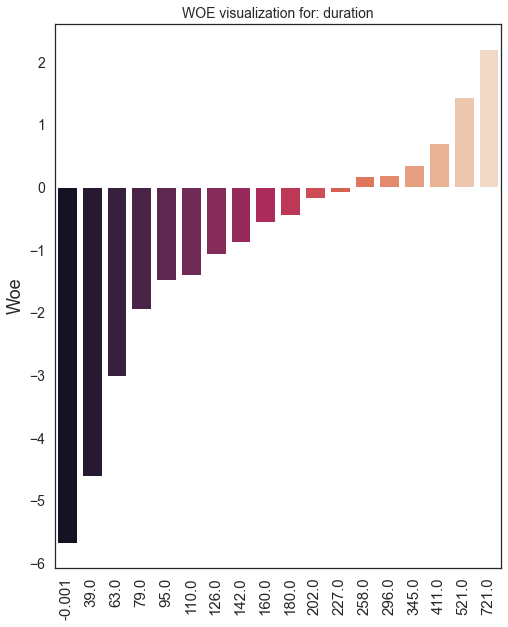

In [88]:
iv.draw_woe(feat_duration)


Customers were more likely to subscribe to the term deposit when their last contact duration was 4.3 minutes or longer, according to duration analysis. It is possible that customers who are more interested in the term deposit may naturally have longer conversations with the bank representative.

### statsSignificance

In [89]:
p_value, effect_size = s.calculate_chi(feat_duration)
print('A feature with effect size: %0.2f' % effect_size)
s.print_chi(feat_duration)


A feature with effect size: 0.42
P-value: 0.00
Effect size: 0.42
Duration is a strong predictor


## Employee Variation Rate

In [90]:
feat_employment_variation_rate.df_lite.head()


,bin,target
0,-1.8,0
1,-1.8,0
2,-1.8,0
3,-1.8,0
4,-1.8,0


In [91]:
iv.group_by_feature(feat_employment_variation_rate)

,employment_variation_rate,count,good,bad
0,-3.401,12086,2596,9490
1,-1.800,12862,1177,11685
2,1.100,16228,866,15362


In [92]:
iv_df, iv_value = iv.calculate_iv(feat_employment_variation_rate)
display(iv_df)
print('Information value: ', iv_value)

,employment_variation_rate,count,good,bad,perc_good,perc_bad,perc_diff,woe,iv
0,-3.401,12086,2596,9490,0.559603,0.259737,0.299867,0.767560,0.230166
1,-1.800,12862,1177,11685,0.253718,0.319813,-0.066094,-0.231511,0.015302
2,1.100,16228,866,15362,0.186678,0.420451,-0.233772,-0.811941,0.189809


Information value:  0.4352763949121961


### statsSignificance

In [93]:
p_value, effect_size = s.calculate_chi(feat_employment_variation_rate)
print('A feature with effect size: %0.2f' % effect_size)
s.print_chi(feat_employment_variation_rate)

A feature with effect size: 0.21
P-value: 0.00
Effect size: 0.21
Employment_variation_rate is a medium predictor


### CategoricalFeature() - this class provides a simple and straightforward way to generate a dataframe that summarizes the distribution of a categorical feature and its relationship to the target variable.

In [94]:
feat_job = CategoricalFeature(data, 'job')

feat_marital = CategoricalFeature(data, 'marital')

feat_contact = CategoricalFeature(data, 'contact')

feat_education_mod = CategoricalFeature(data, 'education_mod')

feat_is_new = CategoricalFeature(data, 'is_new')

feat_poutcome = CategoricalFeature(data, 'poutcome')

feat_month = CategoricalFeature(data, 'month')



## MONTH

In [95]:
feat_month.df_lite.head()

,bin,target
0,may,0
1,may,0
2,may,0
3,may,0
4,may,0


In [96]:
iv_df, iv_value = iv.calculate_iv(feat_month)
display(iv_df)
print('Information value: ', iv_value)

,month,count,good,bad,perc_good,perc_bad,perc_diff,woe,iv
0,apr,2631,539,2092,0.116189,0.057257,0.058932,0.707666,0.041704
1,aug,6176,655,5521,0.141194,0.151107,-0.009913,-0.067852,0.000673
2,dec,182,89,93,0.019185,0.002545,0.016640,2.019863,0.033610
3,jul,7169,648,6521,0.139685,0.178477,-0.038791,-0.245066,0.009506
4,jun,5318,559,4759,0.120500,0.130252,-0.009751,-0.077817,0.000759
5,mar,546,276,270,0.059496,0.007390,0.052106,2.085806,0.108683
6,may,13767,886,12881,0.190989,0.352547,-0.161557,-0.612965,0.099029
7,nov,4100,416,3684,0.089674,0.100829,-0.011155,-0.117243,0.001308
8,oct,717,315,402,0.067903,0.011003,0.056900,1.819947,0.103555
9,sep,570,256,314,0.055184,0.008594,0.046590,1.859611,0.086640


Information value:  0.48546626690111366


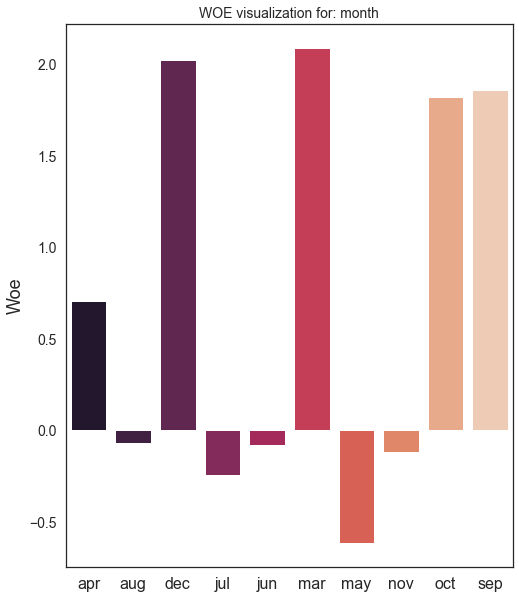

In [97]:
iv.draw_woe(feat_month)


Customers last contacted in April, December, March, October, and September are more likely to subscribe to a term deposit. This could be due to various factors, such as seasonal changes in financial behavior, holiday bonuses, or specific marketing campaigns targeting these months.

### statsSignificance

In [98]:
p_value, effect_size = s.calculate_chi(feat_month)
print('A feature with effect size: %0.2f' % effect_size)
s.print_chi(feat_month)

A feature with effect size: 0.27
P-value: 0.00
Effect size: 0.27
Month is a medium predictor


## POUTCOME

In [99]:
feat_poutcome.df_lite.head()

,bin,target
0,nonexistent,0
1,nonexistent,0
2,nonexistent,0
3,nonexistent,0
4,nonexistent,0


In [100]:
iv.group_by_feature(feat_poutcome)

,poutcome,count,good,bad
0,failure,4252,605,3647
1,nonexistent,35551,3140,32411
2,success,1373,894,479


In [101]:
iv_df, iv_value = iv.calculate_iv(feat_poutcome)
display(iv_df)
print('Information value: ', iv_value)

,poutcome,count,good,bad,perc_good,perc_bad,perc_diff,woe,iv
0,failure,4252,605,3647,0.130416,0.099817,0.030599,0.267395,0.008182
1,nonexistent,35551,3140,32411,0.676870,0.887073,-0.210203,-0.270448,0.056849
2,success,1373,894,479,0.192714,0.013110,0.179604,2.687832,0.482745


Information value:  0.5477765054930395


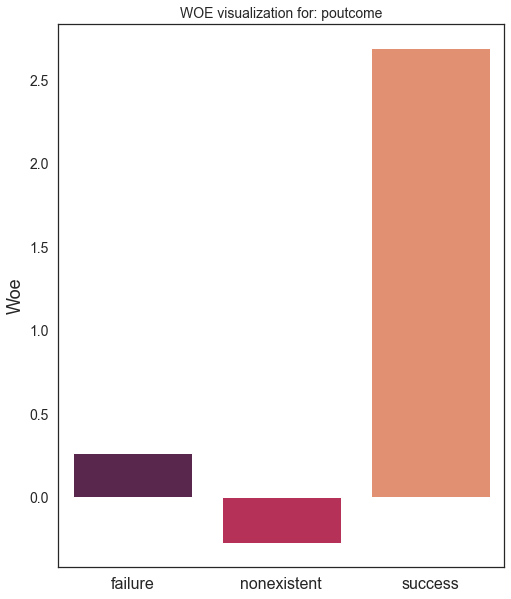

In [102]:
iv.draw_woe(feat_poutcome)

### statsSignificance

In [103]:
p_value, effect_size = s.calculate_chi(feat_poutcome)
print('A feature with effect size: %0.2f' % effect_size)
s.print_chi(feat_poutcome)

A feature with effect size: 0.32
P-value: 0.00
Effect size: 0.32
Poutcome is a medium predictor


## Job

In [104]:
feat_job.df_lite.head()

,bin,target
0,housemaid,0
1,services,0
2,services,0
3,admin.,0
4,services,0


In [105]:
iv.group_by_feature(feat_job)

,job,count,good,bad
0,admin.,10419,1351,9068
1,blue-collar,9253,638,8615
2,entrepreneur,1456,124,1332
3,housemaid,1060,106,954
4,management,2924,328,2596
5,retired,1718,434,1284
6,self-employed,1421,149,1272
7,services,3967,323,3644
8,student,875,275,600
9,technician,6739,730,6009


In [106]:
iv_df, iv_value = iv.calculate_iv(feat_job)
display(iv_df)
print('Information value: ', iv_value)

,job,count,good,bad,perc_good,perc_bad,perc_diff,woe,iv
0,admin.,10419,1351,9068,0.291227,0.248187,0.043040,0.159920,6.882921e-03
1,blue-collar,9253,638,8615,0.137530,0.235788,-0.098259,-0.539095,5.297082e-02
2,entrepreneur,1456,124,1332,0.026730,0.036456,-0.009726,-0.310329,3.018349e-03
3,housemaid,1060,106,954,0.022850,0.026111,-0.003261,-0.133398,4.349795e-04
4,management,2924,328,2596,0.070705,0.071051,-0.000346,-0.004887,1.692657e-06
5,retired,1718,434,1284,0.093555,0.035142,0.058412,0.979136,5.719346e-02
6,self-employed,1421,149,1272,0.032119,0.034814,-0.002695,-0.080573,2.171464e-04
7,services,3967,323,3644,0.069627,0.099735,-0.030107,-0.359358,1.081936e-02
8,student,875,275,600,0.059280,0.016422,0.042858,1.283668,5.501584e-02
9,technician,6739,730,6009,0.157362,0.164463,-0.007102,-0.044142,3.134963e-04


Information value:  0.18878522420109214


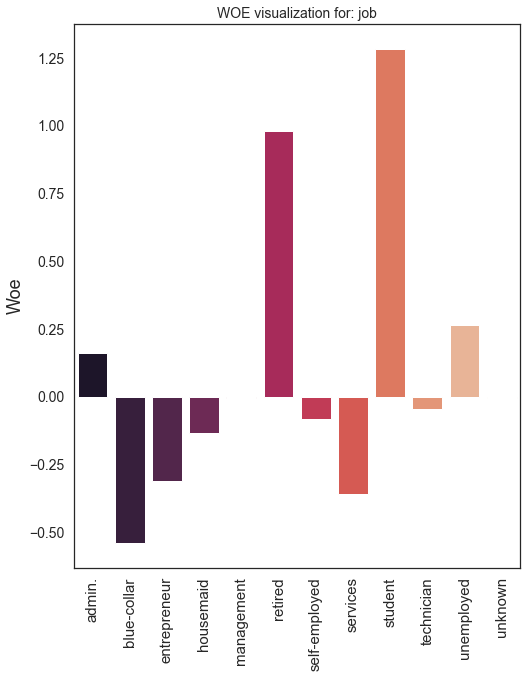

In [107]:
iv.draw_woe(feat_job)


Blue-collar, Entrepreneur, Housemaid, Self-employed, Services, and Technician are job categories with negative WoE values, which means that people in these professions are less likely to subscribe to a term deposit. It could be because people in these professions may have lower income levels, making them less likely to save money in long-term deposits.
Retired and Unemployed are job categories with high (positive) WoE values, indicating that people in these professions are more likely to subscribe to a term deposit. It could be because people in these professions may have more free time to manage their finances and plan for their future, or may have a higher net worth and are more likely to invest in long-term savings options.
Students have a high (positive) WoE value, indicating that they are more likely to subscribe to a term deposit. This could be because they are at a stage in life where they may not have many expenses, making it easier for them to save money.

### statsSignificance

In [108]:
p_value, effect_size = s.calculate_chi(feat_job)
print('A feature with effect size: %0.2f' % effect_size)
s.print_chi(feat_job)


A feature with effect size: 0.15
P-value: 0.00
Effect size: 0.15
Job is a weak predictor


## MARITAL

In [109]:
feat_marital.df_lite.head()


,bin,target
0,married,0
1,married,0
2,married,0
3,married,0
4,married,0


In [110]:
iv.group_by_feature(feat_marital)

,marital,count,good,bad
0,divorced,4611,476,4135
1,married,24921,2531,22390
2,single,11564,1620,9944
3,unknown,80,12,68


In [111]:
iv_df, iv_value = iv.calculate_iv(feat_marital)
display(iv_df)
print('Information value: ', iv_value)

,marital,count,good,bad,perc_good,perc_bad,perc_diff,woe,iv
0,divorced,4611,476,4135,0.102608,0.113173,-0.010565,-0.097998,0.001035
1,married,24921,2531,22390,0.545592,0.612803,-0.067212,-0.116173,0.007808
2,single,11564,1620,9944,0.349213,0.272162,0.077051,0.249283,0.019207
3,unknown,80,12,68,0.002587,0.001861,0.000726,0.329226,0.000239


Information value:  0.02828989172554573


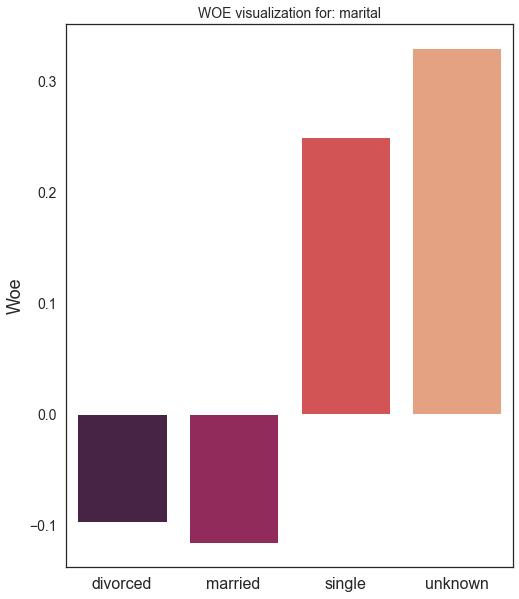

In [112]:
iv.draw_woe(feat_marital)

It appears that customers who are divorced or married are less likely to subscribe to the term deposit. This is indicated by a negative WoE, which suggests that these categories have lower predictive power for subscription to term deposits. In contrast, single and unknown customers have a positive WoE, indicating a higher predictive power for subscription to term deposits.


This could be because divorced and married customers may have more financial commitments, such as mortgage payments or childcare expenses, which may make it more challenging for them to save or invest in a term deposit. Single and unknown customers, on the other hand, may have more disposable income, making them more likely to invest in term deposits.

## statsSignificance

In [113]:
p_value, effect_size = s.calculate_chi(feat_marital)
print('A feature with effect size: %0.2f' % effect_size)
s.print_chi(feat_marital)


A feature with effect size: 0.05
P-value: 0.00
Effect size: 0.05
Marital is a useless predictor


## CONTACT

In [114]:
feat_contact.df_lite.head()


,bin,target
0,telephone,0
1,telephone,0
2,telephone,0
3,telephone,0
4,telephone,0


In [115]:
iv.group_by_feature(feat_contact)

,contact,count,good,bad
0,cellular,26135,3852,22283
1,telephone,15041,787,14254


In [116]:
iv_df, iv_value = iv.calculate_iv(feat_contact)
display(iv_df)
print('Information value: ', iv_value)

,contact,count,good,bad,perc_good,perc_bad,perc_diff,woe,iv
0,cellular,26135,3852,22283,0.830351,0.609875,0.220476,0.308595,0.068038
1,telephone,15041,787,14254,0.169649,0.390125,-0.220476,-0.832738,0.183599


Information value:  0.2516370535802975


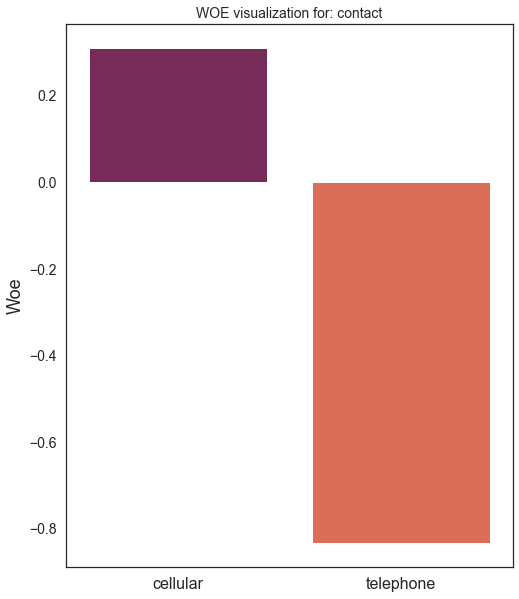

In [117]:
iv.draw_woe(feat_contact)


WoE value for cellular is positive suggests that customers who are contacted through cellular are more likely to subscribe to a term deposit, while the fact that the WoE value for telephone is negative suggests that customers who are contacted through telephone are less likely to subscribe to a term deposit.


However, it is important to note that WoE alone is not sufficient to determine the causal relationship between the predictor variable and the target variable. Other factors may be at play, such as the characteristics of the customers who are more likely to use cellular or telephone, or the specific messaging used in the different modes of contact. Therefore, while WoE can provide valuable insights into the predictive power of different variables, it should be used in conjunction with other analytical techniques to develop a more nuanced understanding of the relationship between variables.

### statsSignificance

In [118]:
p_value, effect_size = s.calculate_chi(feat_contact)
print('A feature with effect size: %0.2f' % effect_size)
s.print_chi(feat_contact)


A feature with effect size: 0.14
P-value: 0.00
Effect size: 0.14
Contact is a weak predictor


## EDUCATION

In [119]:
feat_education_mod.df_lite.head()


,bin,target
0,school_dropout,0
1,school_passout,0
2,school_passout,0
3,school_dropout,0
4,school_passout,0


In [120]:
iv.group_by_feature(feat_education_mod)

,education_mod,count,good,bad
0,advanced_degree,5240,595,4645
1,school_dropout,12512,1089,11423
2,school_passout,9512,1031,8481
3,university_graduate,12164,1669,10495
4,unknown,1748,255,1493


In [121]:
iv_df, iv_value = iv.calculate_iv(feat_education_mod)
display(iv_df)
print('Information value: ', iv_value)

,education_mod,count,good,bad,perc_good,perc_bad,perc_diff,woe,iv
0,advanced_degree,5240,595,4645,0.128260,0.127131,0.001129,0.008841,0.000010
1,school_dropout,12512,1089,11423,0.234749,0.312642,-0.077893,-0.286542,0.022320
2,school_passout,9512,1031,8481,0.222246,0.232121,-0.009875,-0.043473,0.000429
3,university_graduate,12164,1669,10495,0.359776,0.287243,0.072533,0.225152,0.016331
4,unknown,1748,255,1493,0.054969,0.040863,0.014106,0.296547,0.004183


Information value:  0.043272968019305615


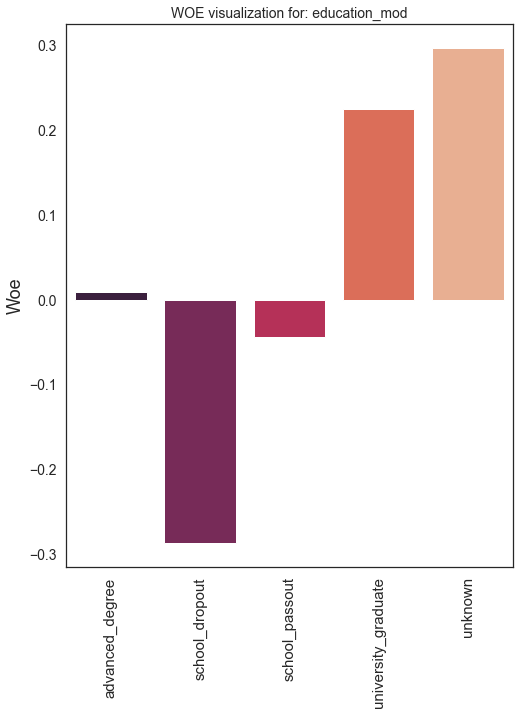

In [122]:
iv.draw_woe(feat_education_mod)


Customers with lower levels of education, such as school dropouts and passouts, are less likely to subscribe to a term deposit. This could be due to various reasons, such as lower income levels or lack of financial literacy.


Conversely, customers with higher levels of education, such as those with advanced degrees or university graduates, are more likely to subscribe to a term deposit. This could be because they have a better understanding of the benefits of saving and investing.

### statsSignificance

In [123]:
p_value, effect_size = s.calculate_chi(feat_education_mod)
print('A feature with effect size: %0.2f' % effect_size)
s.print_chi(feat_education_mod)

A feature with effect size: 0.07
P-value: 0.00
Effect size: 0.07
Education_mod is a useless predictor


## Is New Customer

In [124]:
feat_is_new.df_lite.head()


,bin,target
0,new,0
1,new,0
2,new,0
3,new,0
4,new,0


In [125]:
iv.group_by_feature(feat_is_new)

,is_new,count,good,bad
0,new,35551,3140,32411
1,old,5625,1499,4126


In [126]:
iv_df, iv_value = iv.calculate_iv(feat_is_new)
display(iv_df)
print('Information value: ', iv_value)

,is_new,count,good,bad,perc_good,perc_bad,perc_diff,woe,iv
0,new,35551,3140,32411,0.67687,0.887073,-0.210203,-0.270448,0.056849
1,old,5625,1499,4126,0.32313,0.112927,0.210203,1.051316,0.220990


Information value:  0.2778394214582765


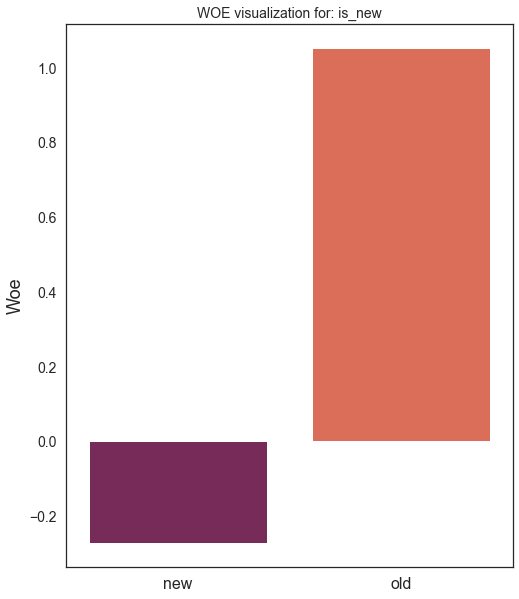

In [127]:
iv.draw_woe(feat_is_new)


A positive WoE value for the "is_new" feature suggests that old customers are more likely to subscribe to a term deposit than new customers. Conversely, a negative WoE value indicates that new customers are less likely to subscribe to a term deposit than old customers.

### statsSignificance

In [128]:
p_value, effect_size = s.calculate_chi(feat_is_new)
print('A feature with effect size: %0.2f' % effect_size)
s.print_chi(feat_is_new)


A feature with effect size: 0.19
P-value: 0.00
Effect size: 0.19
Is_new is a weak predictor


In [129]:
feats_dict = {}

for col in [c for c in data.columns if c != 'target']:
    if is_numeric_dtype(data[col]):
        feats_dict[col] = ContinuousFeature(data, col)
    else:
        feats_dict[col] = CategoricalFeature(data, col)

feats = list(feats_dict.values())

## Attribute Relevance Class

In [130]:
ar = AttributeRelevance()
ar.bulk_iv(feats, iv).head()

/Users/kajalshukla/opt/anaconda3/lib/python3.9/site-packages/pandas/core/arraylike.py:397: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


,iv
job,0.188785
marital,0.028290
default,0.127787
housing,0.001397
loan,0.000270


In [131]:
ar.bulk_iv(feats, iv, woe_extremes=True).head()

/Users/kajalshukla/opt/anaconda3/lib/python3.9/site-packages/pandas/core/arraylike.py:397: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


,iv,woe_min,woe_max
job,0.188785,-0.539095,1.283668
marital,0.028290,-0.116173,0.329226
default,0.127787,-0.848745,0.152238
housing,0.001397,-0.046670,0.035112
loan,0.000270,-0.046670,0.007480


In [132]:
ar.bulk_stats(feats, s).head()


,p-value,effect_size
job,3.268412e-199,0.152830
marital,1.778423e-26,0.054646
default,5.217541e-89,0.099366
housing,5.663793e-02,0.011809
loan,5.771532e-01,0.005167


In [133]:
ar.analyze(feats, iv).head()


/Users/kajalshukla/opt/anaconda3/lib/python3.9/site-packages/pandas/core/arraylike.py:397: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


,iv
duration,1.913667
poutcome,0.547777
month,0.485466
employment_variation_rate,0.435276
euribor_3_month_rate,0.348373


In [134]:
ar.analyze(feats, iv, s).head()


/Users/kajalshukla/opt/anaconda3/lib/python3.9/site-packages/pandas/core/arraylike.py:397: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


,iv,p-value,effect_size
duration,1.913667,0.000000e+00,0.420476
poutcome,0.547777,0.000000e+00,0.320520
month,0.485466,0.000000e+00,0.274518
employment_variation_rate,0.435276,0.000000e+00,0.214210
euribor_3_month_rate,0.348373,3.474881e-278,0.175632


In [135]:
df_analysis = ar.analyze(feats, iv, s, interpretation=True)
display(df_analysis)

/Users/kajalshukla/opt/anaconda3/lib/python3.9/site-packages/pandas/core/arraylike.py:397: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


,iv,p-value,effect_size,iv_interpretation,es_interpretation
duration,1.913667,0.000000e+00,0.420476,suspicious,strong
poutcome,0.547777,0.000000e+00,0.320520,suspicious,medium
month,0.485466,0.000000e+00,0.274518,strong,medium
employment_variation_rate,0.435276,0.000000e+00,0.214210,strong,medium
euribor_3_month_rate,0.348373,3.474881e-278,0.175632,strong,weak
number_of_employees,0.342291,3.951258e-279,0.175933,strong,weak
is_new,0.277839,0.000000e+00,0.193411,medium,weak
contact,0.251637,1.718741e-189,0.144694,medium,weak
job,0.188785,3.268412e-199,0.152830,medium,weak
default,0.127787,5.217541e-89,0.099366,medium,useless


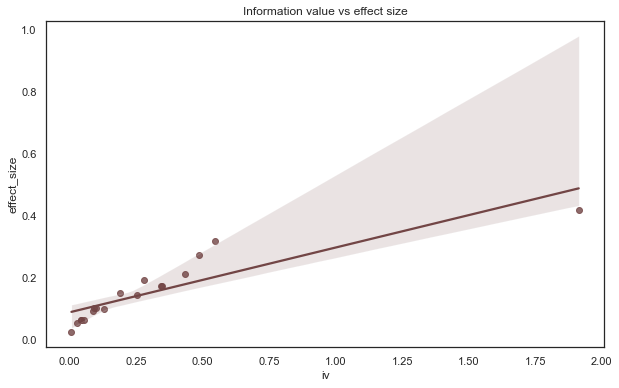

Pearson correlation: 0.88
Spearman correlation: 0.98


In [136]:
df_analysis_sign = df_analysis[df_analysis['p-value']<0.05]

fig, ax = plt.subplots(figsize=(10,6))
sns.regplot(x='iv', y='effect_size', data=df_analysis_sign, color='#724545')
ax.set_title('Information value vs effect size')
plt.show()

print('Pearson correlation: %0.2f' % df_analysis_sign['iv'].corr(df_analysis_sign['effect_size']))
print('Spearman correlation: %0.2f' % df_analysis_sign['iv'].corr(df_analysis_sign['effect_size'], method='spearman'))

There is strong, almost linear, relationship between information value and effect size. Features with high information value have high effect size as well. Correlation coefficient for these values is: 0.88 (Pearson) and 0.99 (Spearman).

In [137]:
ar.analyze(feats, iv, s, interpretation=True).head()


/Users/kajalshukla/opt/anaconda3/lib/python3.9/site-packages/pandas/core/arraylike.py:397: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


,iv,p-value,effect_size,iv_interpretation,es_interpretation
duration,1.913667,0.000000e+00,0.420476,suspicious,strong
poutcome,0.547777,0.000000e+00,0.320520,suspicious,medium
month,0.485466,0.000000e+00,0.274518,strong,medium
employment_variation_rate,0.435276,0.000000e+00,0.214210,strong,medium
euribor_3_month_rate,0.348373,3.474881e-278,0.175632,strong,weak


In [ ]:
ar.draw_iv(feats, iv)

In [ ]:
ar.draw_woe_extremes(feats, iv)
